# biocharStability - Incubation temperature adjustment

**Introduction**

Lehmann (2015) suggested a method to convert biochar decomposition rates obtained at one temperature to another temperature. This is motivated by the fact that incubation experiments are performed at higher (and constant) temperatures than what is observed in most natural soils. This method was also used in IPCC's appendix for biochar carbon sequestration inventories (2019, by Lehmann), and in the paper by Woolf et al. 2021. 

The method is based on so-called temperature sensivitity of soil respiration. The temperature sensitivity is noted and expressed as "Q10". Most soil respiration models assume a fixed Q10 value of 1.5 to 2.0 for the increase of soil respirtation associated with a increase in temperature of 10 degrees C (Meyer & Amelung, 2018).

Based on various experiments reported in the litterature, Lehmann and colleagues provided a series of Q10 factors for biochar (Lehmann 2015). This data was retrieved and compiled in our database, in the file `biochar_q10_dataset_2022-05-27.xlsx`. The datasets contains 32 observations from 4 studies, with 1 studies contributing to more than 60% of the observation (Nguyen et al. 2010). The Q10 values for biochar is assumed to be a function of temperature.

_References:_

- Meyer & Amelung, 2018, https://doi.org/10.1002/2017GB005644
- Lehmann 2015, book chapter
- Woolf et al. 2021, https://doi.org/10.1021/acs.est.1c02425
- Nguyen et al. 2010, https://doi.org/10.1021/es903016y

**Mathematical relationships**

*How is a soil respiration Q10 value experimentally determined in an experiment?*

It is measured via a soil incubation experiment at various temperatures, and curve fitting between soil respiration rate ($k$) and temperature ($T$). For details, refer to section 2.6 in the method chapter of Meyer & Amelung, 2018, https://doi.org/10.1002/2017GB005644

The $Q_{10}$ is then defined as: $Q_{10} = e^{10*b}$ where b is a regression coefficient from $ k = a * e^{b*T}$

*How is a biochar Q10 value experimentally determined in an experiment?*

Nguyen et al. 2010 have incubated biochars in pure sand with a microbial innoculum and nutrient solution for 1 year and measured after 1 year the carbon loss, contents of N, H, O and CEC. Six temperature levels were used 4, 10, 20, 30, 45, 60 degrees C, for 2 biomass types, 2 charring temperatures.

Key results in Nguyen's article:
- BC was mineralized to a greater extent when incubation temperature was increased from 4 to 30 °C, at which C loss was 4.6% and 14.6%, respectively (data calculated, based on the fitted model). Remaining C (percent of initial C) of corn-BC was significantly lower than that of oak-BC, and remaining C of 350-BC was significantly lower than that of 600-BC at any incubation temperature (Figure 3B). The change of BC mineralization as a function of incubation temperature significantly depended on BC types. For example, the temperature sensitivity of corn-600-BC from 4 to 30 °C incubation temperature was greater than that of corn-350-BC (Figure 3B).
- With increasing incubation temperature, the O/C ratios increased and a first order model was a good fit (r2 = 0.96) to the data points (Figure 5A). At temperatures higher than 10 °C, the O/C ratios of the 4 BC materials after incubation were significantly greater than before incubation. Relative increases in O/C ratios as a function of incubation temperature were significant (P < 0.05) and similar among the four BC materials.
- The Q10 is a quantitative measure of the temperature sensitivity and describes a relative increase in decomposition with warming. In the lowest temperature range from 4 to 10 °C, the Q10 value of corn-350-BC, 1.6, was much smaller than those of the other BC materials, varying from 4.2 to 5.8 (Figure 6A). At higher temperature ranges, the difference in Q10 between the four BC materials decreased, varying from 1.01 to 1.82, with corn-350-BC still having the lowest and oak-600-BC the highest. Relative to the Q10 at 4−10 °C, the Q10 values of corn-350-BC decreased to a lesser extent with increasing incubation temperature ranges than those of the other materials (Figure 6B).

Note that the data from Nguyen is not in the biochar incubation database, because only 1 measurement of carbon was made (amount remaining after 1 year) which cannot be used to fit anything else than a linear or single exponential model.

*What is the relationship between biochar Q10 and soil temperature determined?*

The relationship between biochar Q10 and soil temperature is obtained by curve fitting procedure on the experimental data available. The curve fitting assumes an exponential relation. The currently suggested relationship (Woolf et al. 2021) is :

$$ Q_{10}(T) = 1.1 + 12.0 e^{-0.19 T}  $$


*What is the relationship between two decay rates at two different temperatures?*

Give two soil temperatures, $T_1$ and $T_2$, and the associated decay rates, $k_1$ and $k_2$, the decay rates are link as follow:

$$ k_2 = k_1 * f_{T} $$ 

where $f_T$ is equal to :

$$ f_{T_{1-2}} = \frac{k_2}{k_1} = e^{ln(Q_{10}^{avg})  \frac{(T_2-T_1)}{10} } = {Q_{10}^{avg}}^{\frac{(T_2-T_1)}{10}} $$

$$ f_{T_{1-2}} = \frac{k_2}{k_1} = {Q_{10}^{avg}}^{\frac{(T_2-T_1)}{10}} $$

$$ f_{T_{1-2}} * f_{T_{2-3}} \neq f_{T_{1-3}} $$


and $Q_{10}^{avg}$ is the average value of $Q_{10}$ over the interval $T_1$ to $T_2$

$$ Q_{10}^{avg} = \frac{1}{(T2-T1)} * \int_{T_1}^{T_2} Q_{10}(T) dT  $$

which can be calculated, with the curve fitted relationship as:

$$ Q_{10}^{avg} = 1.1 + 63.1579 * \frac{e^{-0.19*T_1} - e^{-0.19*T_2} }{T_2 - T_1} $$

The factor $f_T$ has the following property:
* if $T_2$ > $T_1$, then $f_T$ > 1 (increased temperature, leads to increased decay rate)
* if $T_1$ > $T_2$, then $f_T$ < 1

**Use of Q10 for biochar in modelling of persistence**

In the modelling of biochar persistence, the use of biochar Q10 is needed to capture differences between incubation temperatures used in different experiments, and also differences between laboratory and field conditions. Usually, laboratory incubation is performed at higher temperature than in the field, likely leading to an overestimation of carbon loss (all other factors neglected).

In the modelling of biochar persistence by Woolf et al. 2021, curve fitting of biochar decay incubation is perfomed at the original incubation temperature. The curve fitting provides decay rates (k1, k2, k3) and pool sizes (c1, c2, c3). The temperature correction is applied to the fitted decay rates (rather than the actual measured decay rates). The temperature-corrected decay rates are then used to calculate temperature-adjusted 100-year permanence and MRTs, which can be input to a correlation model with metadata such as H/C ratio.


*Questions to investigate here*
- Why is the temperature correction applied after curve fitting, instead of being applied on measured decay rates before curve fitting? A practical answer can already be given: when time series of decay rates are not available, but only fitted parameters are available, it's difficult to do differently. Working with time series is more complex.  


- With the numerical relationships currently used for biochar Q10, how are biochar decay rates affected for a range of temperature changes? (abacus)


- Is the relationship valid for any temperature range from 0 to 60 degrees, or should it be limited to a more narrow range of temperatures?


- At what incubation temperature shall we present biochar permanence models?
    - Currently, Woolf et al. 2021 main result is presented at the global average soil temperature, of 15&deg;C
    - IPCC 2019 model is presented at a "conservative" soil temperature of 20&deg;C
    - Hypothesis: to minimise uncertainty introduced with the temperature correction, one could also work at the most common incubation temperature present in the data set (the mode, or the average). Which is?


- The observations from Fang2014 available in the database have been performed at multiple temperatures (for a given biochar, all other factors kept equal). Can these observations be used to confirm/validate the Q10 method?
    - Noting that...Q10 dataset contains some Q10 values dervied from Fang2017 (different article, different experiments?)
    - Are there other articles with observations at different temperatures?


In [217]:
import biocharStability as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import string
fp = 'biocharStability/database/biochar_incubation_database_2022-03-22_live.xlsx'
metadata, schema, metadata_column_sets = bs.load_metadata(filepath=fp)
data = bs.load_data(filepath=fp)
articles = bs.load_articles(filepath=fp)
q10data = bs.load_q10data()

Metadata loaded, with 181 rows
Data loaded, with 2836 rows
Articles loaded, with 75 rows
Q10 data loaded, with 32 rows


## Biochar Q10 data

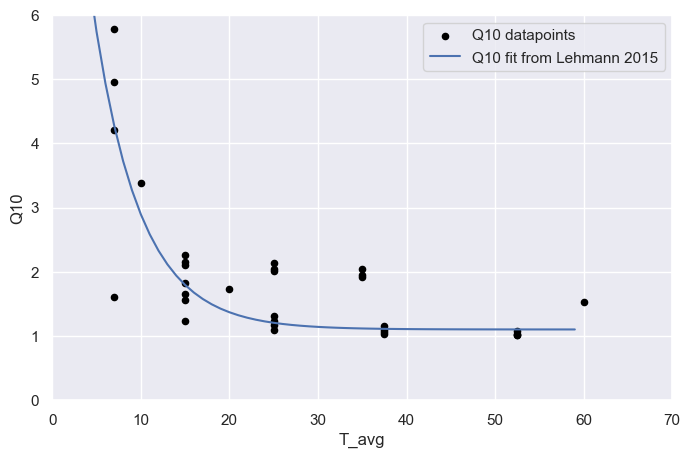

In [2]:
# load, plot, curve fit
fig, ax = plt.subplots(1,1,figsize=(8,5))
q10data.plot(ax=ax, kind='scatter', x='T_avg', y='Q10', color='black', label="Q10 datapoints")
ax.set_xlim([0,70])
ax.set_ylim([0,6])

def q10lehmann(T):
    return 1.1 + 12.0*np.exp(-0.19*T)
x = range(2, 60)
y = [q10lehmann(T) for T in x ]
ax.plot(x, y, label="Q10 fit from Lehmann 2015")
plt.legend()
plt.show()

## Effect of biochar Q10 on decay rates - numerical analysis

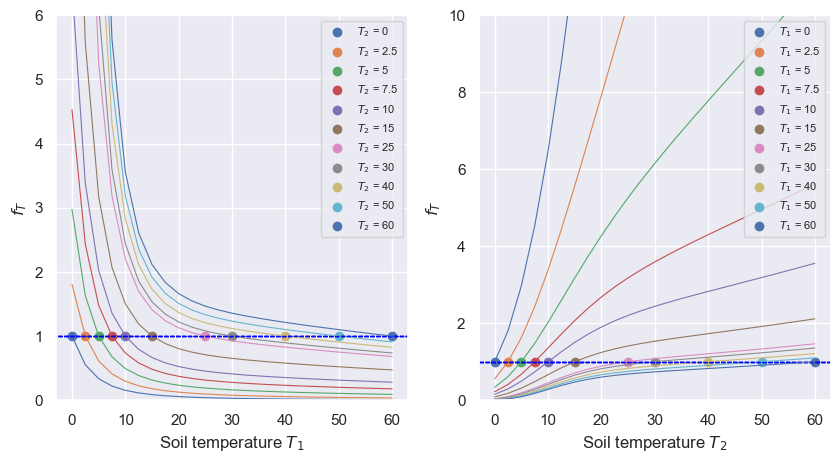

In [3]:
# we retrive the following functions defined in bs.applyQ10, slightly modified 
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8, loc='upper right')
    axl[1].set_ylim([0,10])
    
for x0 in [0, 2.5, 5, 7.5, 10, 15, 25, 30, 40, 50, 60]:
    q10_var(x0)
    q10_var2(x0)
    
#fig.savefig('simulations/temperature-correction/fT_Woolf2021.png', dpi=600)

How to read the above graphs?

- My experimental decay rate was calculated at T1 = 10 degrees,
- and I want to convert it to a temperature T2 = 25 degrees, 
- the decay rate must be multiplied by fT = 2.25 (higher decay rate at higher temperature)
- This value fT = 2.25 can be read on both graphs, on the correct curves

Use left graph, with T1 in axis, when 
- I want to convert my data to target temperature T2=60 (find the curve)
- Read on the x axis, the temperature from the initial data
- Read the fT factor

Use right graph, this way:
- My data is at T1=60 (find corresponding curve)
- Read on the x axis, the target temperature T2
- Read the fT factor


### Let's explore what happens when we make multiple successive conversions:**
- Do we find the same conversion factor as if we were to make a direct conversion? (expected behaviour)

In [105]:
# if we do multiple succcesive conversions, do we find the same factors?
T1 = 10
T2 = 20
T3 = 50
direct = fT(T1, T3)
indirect = fT(T1, T2) * fT(T2, T3)
very_indirect=1
step=0.0001
for i,x in enumerate(np.arange(T1,T3,step)):
    very_indirect = very_indirect*fT(x, x+step)
direct, indirect, very_indirect

(3.1862620957229417, 2.871709386967358, 2.7909966562306283)

* It seems that a direct conversion from a low to high temperature has a higher fT than doing the conversion degree by degree. This behaviour seems unexpected or un-natural. Why is it so that the conversion is not transitive?
* The smaller the step is, the fT factor seems to converge to a fixed value. 
* The larget the deltaT, the larger the fT seems to be; implying that the figures above may be erroneous?

**Hypothesis:**
- It has to do with the integral and the average made for calculating Q10, suggested in Woolf 2021.
- The fT equation is not linear in DeltaT. 
- From rapid reading upon Q10 determination and definition in convential soils, I believe the Q10_avg suggested in Woolf, is not the standard way it is used for conventional organic matter. To be investigated.

**Investigation:** (calculations made on paper, in the underground)
- In conventional soil science, temperature sensivity of respiration defines a relation with k and T as follow:

$ k(T) = a * e^{b*T}$ and $Q_{10} = e^{10*b}$, where a and b are determined by curve-fitting, and **Q10 is a constant**

- From this relationship, conversion from k1 to k2 at respective temperatures can be written as (by diving two equations together):

$$ \frac{k_2}{k_1} = Q_{10}^{\frac{T_2 - T_1}{10} }$$

- It is easy to demonstrate, for 3 temperatures, that when converting from k1 to k3 we obtain the same conversion as when converting k1 to k2 to k3. 

- However, for biochar, Q10 is assumed not be constant and depend on temperature with an experimental relationship determined above. This in fact means that we don't assume an exponential relationship between k and T, but instead the following equation: 

$$ k(T) = a * e^{b*T} = a * Q_{10}^{T/10} = a * e^{T/10 * ln (Q_{10}(T)} = a * (\alpha + \beta e^{-\gamma T})^{T/10}$$

- By divinding the above definition for two temperatures k1 and k2, we get the following relation:

$$ \frac{k_2}{k_1} = e^{\frac{1}{10} ( T_2*ln(Q_{10}(T_2)) - T_1*ln(Q_{10}(T_1)) } $$

Note that this is different from relationship provided in Woolf 2021, which was:

$$ f_T = \frac{k_2}{k_1} = e^{ln(Q_{10}^{avg}) * \frac{(T_2-T_1)}{10} } $$


* To Harald&co, with eperiments investigate how the temperature sensiivity of biochar decay rates evolve over the 2 years of experiment. Missing from current data. Is Q10 at 1 year, similar to Q10 at 2 year?
    * can also be checked in Fang 2014 data, k(T)
    * same in our data

Let's re-define the Q10 and fT functions, using the modified equations and analyse the difference with Woolf's equation

In [294]:
def cQ10(T):
    '''calculate Q10 at given temperature based on the temperature dependence statistical relation from Lehmann 2015/Woolf 2021 (but not its integral)
    '''
    #return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) ) # former Woolf relationship: integral average
    return 1.1 + 12.0*np.exp(-0.19*T)

def cfT(T1, T2):
    '''calculate the fT ratio of the decay rates k2 / k1, to use to convert from k1 at T1 to k2 at T2.
    Distinction for T1 == T2 from Woolf is no longer needed.
    '''
    #return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )# former Woolf relationship: 
    return np.exp( ( T2*np.log( cQ10(T2) ) - T1*np.log( cQ10(T1) ) ) /10  )


In [295]:
T1 = 50
T2 = 20
T3 = 10
direct = cfT(T1, T3)
indirect = cfT(T1, T2) * cfT(T2, T3)
very_indirect=1
step=0.01
for i,x in enumerate(np.arange(T3,T1,step)): #OBS: if decroissant/increasing, change order and sign of step
    very_indirect = very_indirect*cfT(x, x-step)
direct, indirect, very_indirect

(1.7901368294539008, 1.7901368294539008, 1.7904997516391548)

This is as it should be: any number of steps provides the same results.

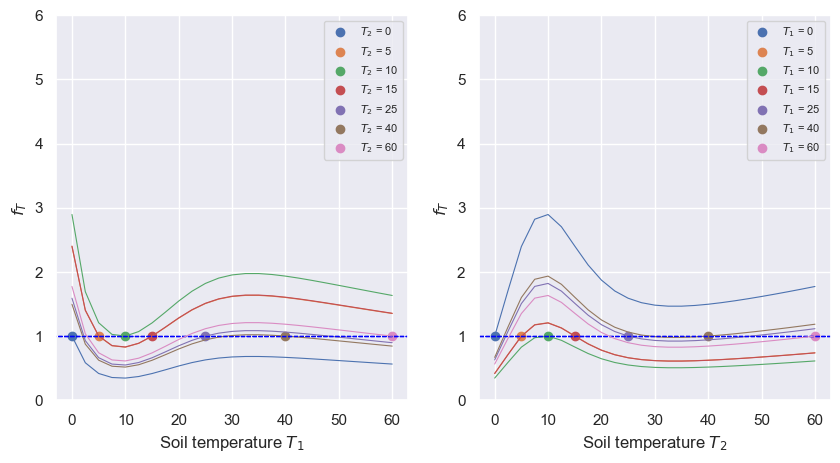

In [95]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [cfT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [cfT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)   

But this is really strange. It tells that the relationship between decay and temperature is anything but as we expect it to be. Let's look at it:

(0.0, 3.0)

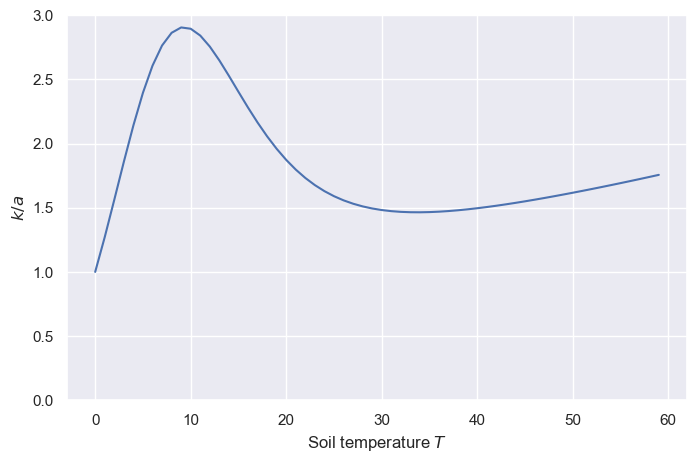

In [10]:
x = np.arange(0,60, 1)
y = [(1.1 + 12.0*np.exp(-0.19*T))**(T/10) for T in x]
fig, ax = plt.subplots(1,1,figsize=(8,5))
plt.plot(x,y)
ax.set_xlabel('Soil temperature $T$')
ax.set_ylabel('$k/a$')
ax.set_ylim([0,3])

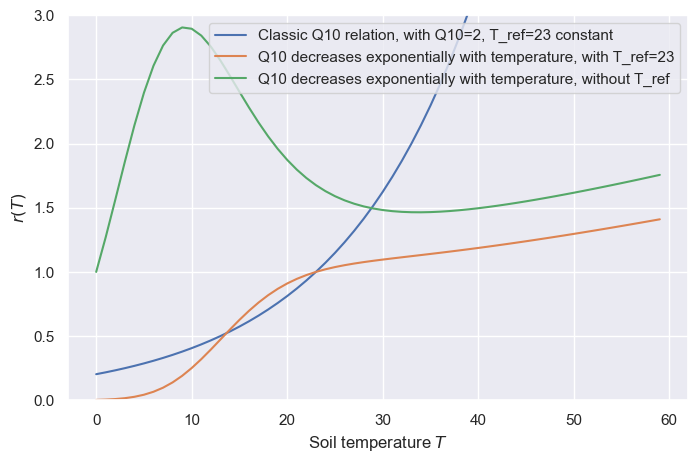

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
x = np.arange(0,60, 1)
y = [np.exp(np.log(2)*(T-23)/10) for T in x] # typical Q10 with Q10=2 and T_ref = 23
plt.plot(x,y, label="Classic Q10 relation, with Q10=2, T_ref=23 constant")
y = [np.exp( np.log(1.1+12*np.exp(-0.19*(T))) * (T-23)/10 ) for T in x] # assuming Q10 varying with temperature (exponentially decreasing)
plt.plot(x,y, label="Q10 decreases exponentially with temperature, with T_ref=23")
y = [(1.1 + 12.0*np.exp(-0.19*(T-0)))**((T)/10) for T in x] # same as above... but needs a T_ref otherwise, looks very strage--
plt.plot(x,y, label="Q10 decreases exponentially with temperature, without T_ref")
y
ax.set_xlabel('Soil temperature $T$')
ax.set_ylabel('$r(T)$')
ax.set_ylim([0,3])
plt.legend()

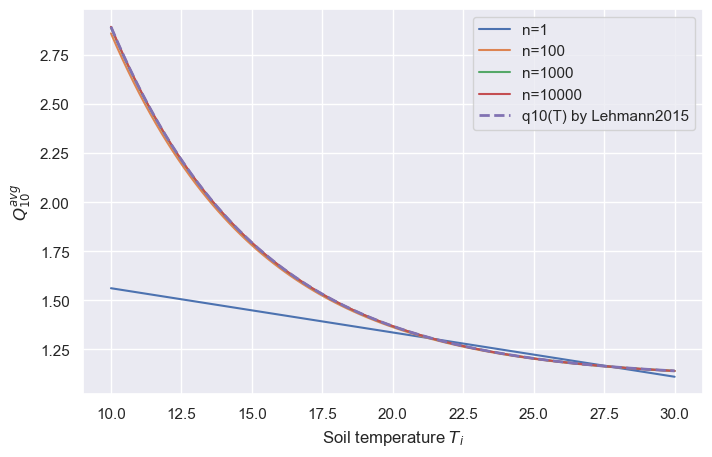

In [14]:
# Q10avg between two very close temperatures (n very large)
T1=10
T2=30
def iQ10avg(Ti, T1=10, T2=30, n=1): # infinitesimal Q10 avg
    return 1.1 - n/(T2-T1)*63.1579*np.exp(-0.19*Ti)*(np.exp(-0.19*(T2-T1)/n)-1)

fig, ax = plt.subplots(1,1,figsize=(8,5))
n=1
x = np.arange(T1,T2+(T2-T1)/n, (T2-T1)/n)
iQ10s = [iQ10avg(10+i*(T2-T1)/n, n=1) for i in range(n+1)]
plt.plot(x, iQ10s, label="n=1")

n=100
x = np.arange(T1,T2+(T2-T1)/n, (T2-T1)/n)
iQ10s = [iQ10avg(10+i*(T2-T1)/n, n=n) for i in range(n+1)]
plt.plot(x, iQ10s, label="n={}".format(n))

n=1000
x = np.arange(T1,T2+(T2-T1)/n, (T2-T1)/n)
iQ10s = [iQ10avg(10+i*(T2-T1)/n, n=n) for i in range(n+1)]
plt.plot(x, iQ10s, label="n={}".format(n))

n=10000
x = np.arange(T1,T2+(T2-T1)/n, (T2-T1)/n)
iQ10s = [iQ10avg(10+i*(T2-T1)/n, n=n) for i in range(n+1)]
plt.plot(x, iQ10s, label="n={}".format(n))

#n=10000000
#x = np.arange(T1,T2+(T2-T1)/n, (T2-T1)/n)
#iQ10s = [iQ10avg(10+i*(T2-T1)/n, n=n) for i in range(n+1)]
#plt.plot(x, iQ10s, label="n={}".format(n))

def q10lehmann(T):
    return 1.1 + 12.0*np.exp(-0.19*T)
y = [q10lehmann(T) for T in x ]
plt.plot(x, y, label="q10(T) by Lehmann2015", ls="dashed", lw=2)


ax.set_xlabel('Soil temperature $T_i$')
ax.set_ylabel('$Q_{10}^{avg}$')

plt.legend()
plt.show()


In [269]:
import itertools
def test_symetry(pairs, func):
    '''
    Test the symetry of the passed func, for the list of pairs inputs
        "symetry" as in func(T1, T2) * func(T2, T1) = 1
    pairs: provided as tuples of (T1, T2)
    func: a function taking as first inputs, the temperatures T1 and T2
    '''
    dif = pd.DataFrame(index=range(len(pairs)), columns=['pairs', 's1', 's2', 'diff'])
    s1=[]
    s2=[]
    for p in pairs:
        s1.append(func(p[0], p[1]))
        s2.append(func(p[1], p[0]))
    dif.pairs = pairs
    dif.s1 = s1
    dif.s2 = s2
    dif['diff'] = dif['s1'].multiply(dif['s2']).values
    return dif

def test_transitivity(triples, func):
    '''
    Test if: r(T1, T2) * r(T2, T3) / r(T1, T3) = 1
    '''
    dif = pd.DataFrame(index=range(len(triples)), columns=['triples', 's1', 's2', 's3', 'diff'])
    s1=[]
    s2=[]
    s3=[]
    for p in triples:
        s1.append(func(p[0], p[1]))
        s2.append(func(p[1], p[2]))
        s3.append(func(p[0], p[2]))
    dif.triples = triples
    dif.s1 = s1
    dif.s2 = s2
    dif.s3 = s3
    dif['diff'] = dif['s1'].multiply(dif['s2']).divide(dif['s3'])
    return dif
    

def fTesa(T1, T2, n=100000):
    '''
    Conversion factor, based on multiple small steps
    '''
    f=1
    sign = +1 if T1<T2 else -1
    T = np.arange(T1, T2, (T2-T1)/n)
    for Ti in T:
        f=f * (1.1 + 12.0*np.exp(-0.19*Ti))**((T2-T1)/10/n)
    return f

T = np.arange(0, 60, 10)
pairs = list(itertools.combinations(T, 2))
triples = list(itertools.combinations(T, 3))
ds_esa = test_symetry(pairs, fTesa)
dt_esa = test_transitivity(triples, fTesa)


In [271]:
woolf = test_transitivity(triples, fT_Woolf)

In [279]:
stepwise = test_transitivity(triples, fT_WoolfStepwise)

In [280]:
stepwise.to_clipboard()

In [273]:
woolf.to_clipboard()

In [225]:
ds_esa

pairs         s1        s2      diff
0    (0, 10)   5.876602  0.170169  1.000015
1    (0, 20)  10.919330  0.091585  1.000045
2    (0, 30)  13.305546  0.075157  1.000000
3    (0, 40)  14.874811  0.067234  1.000099
4    (0, 50)  16.402467  0.060974  1.000124
5   (10, 20)   1.858082  0.538193  1.000007
6   (10, 30)   2.264103  0.441684  1.000019
7   (10, 40)   2.531131  0.395080  1.000000
8   (10, 50)   2.791051  0.358302  1.000039
9   (20, 30)   1.218511  0.820676  1.000002
10  (20, 40)   1.362212  0.734103  1.000004
11  (20, 50)   1.502100  0.665735  1.000000
12  (30, 40)   1.117931  0.894510  1.000000
13  (30, 50)   1.232728  0.811209  1.000001
14  (40, 50)   1.102687  0.906876  1.000000

In [226]:
dt_esa

triples         s1        s2         s3      diff
0    (0, 10, 20)   5.876602  1.858082  10.919330  0.999989
1    (0, 10, 30)   5.876602  2.264103  13.305546  0.999976
2    (0, 10, 40)   5.876602  2.531131  14.874811  0.999976
3    (0, 10, 50)   5.876602  2.791051  16.402467  0.999965
4    (0, 20, 30)  10.919330  1.218511  13.305546  0.999983
5    (0, 20, 40)  10.919330  1.362212  14.874811  0.999975
6    (0, 20, 50)  10.919330  1.502100  16.402467  0.999967
7    (0, 30, 40)  13.305546  1.117931  14.874811  0.999991
8    (0, 30, 50)  13.305546  1.232728  16.402467  0.999979
9    (0, 40, 50)  14.874811  1.102687  16.402467  0.999988
10  (10, 20, 30)   1.858082  1.218511   2.264103  0.999995
11  (10, 20, 40)   1.858082  1.362212   2.531131  0.999988
12  (10, 20, 50)   1.858082  1.502100   2.791051  0.999991
13  (10, 30, 40)   2.264103  1.117931   2.531131  0.999992
14  (10, 30, 50)   2.264103  1.232728   2.791051  0.999990
15  (10, 40, 50)   2.531131  1.102687   2.791051  0.999998
16  (20, 30, 40)   1.218511  1.117931   1.362212  0.999999
17  (20, 30, 50)   1.218511  1.232728   1.502100  0.999995
18  (20, 40, 50)   1.362212  1.102687   1.502100  0.999996
19  (30, 40, 50)   1.117931  1.102687   1.232728  1.000000

### Nguyen2010's raw data

#### Temperature sensitivity in Nguyen2010

Going back to Nguyen2010, and the data available in suporting information, we retrived:
- the carbon loss at 1 year for all temperatures, 
- the properties of the biochar at start of incubation, but also the O/C ratio at end of incubation
- the fitted model of carbon remaining as a function of temperature (for each biochar type, but also the overall mean)

We plot below, the overall mean: $C_{rem} = Y_0 + a * e^{-b*T}$ (where carbon remaining can be converted to decay rates by the following relation: $k = (C_{rem} - C_0) / 365days$

In [9]:
nguyen2010 = pd.read_excel('biocharStability/database/biochar_q10_dataset_2022-05-27.xlsx',
                           sheet_name='Nguyen2010', index_col=None, usecols="B:Q", skiprows=2)
nguyen2010.head()

Incubation temperature (°C) Feedstock  Pyrolysis temperature (°C)  \
0                            4      corn                         350   
1                           10      corn                         350   
2                           20      corn                         350   
3                           30      corn                         350   
4                           45      corn                         350   

   Remaining C (%)  Remaining Carbon StDev  \
0             90.1                    4.80   
1             84.5                    2.95   
2             85.0                    6.83   
3             80.1                    4.99   
4             81.6                    2.42   

   [elias] Average annual decay rate (%/day)  O/C after 1 year  \
0                                   0.027123              0.40   
1                                   0.042466              0.41   
2                                   0.041096              0.43   
3                                   0.054521              0.48   
4                                   0.050411              0.48   

   O/C after 1 year StDev  O/C initial  H/C initial     C    N     O     H  \
0                    0.07         0.37         0.07  67.5  0.9  25.1  4.74   
1                    0.08         0.37         0.07  67.5  0.9  25.1  4.74   
2                    0.03         0.37         0.07  67.5  0.9  25.1  4.74   
3                    0.15         0.37         0.07  67.5  0.9  25.1  4.74   
4                    0.12         0.37         0.07  67.5  0.9  25.1  4.74   

   pH in 1:20 w:v water  CECp mmole(+)kg-1C  
0                  5.88                 610  
1                  5.88                 610  
2                  5.88                 610  
3                  5.88                 610  
4                  5.88                 610

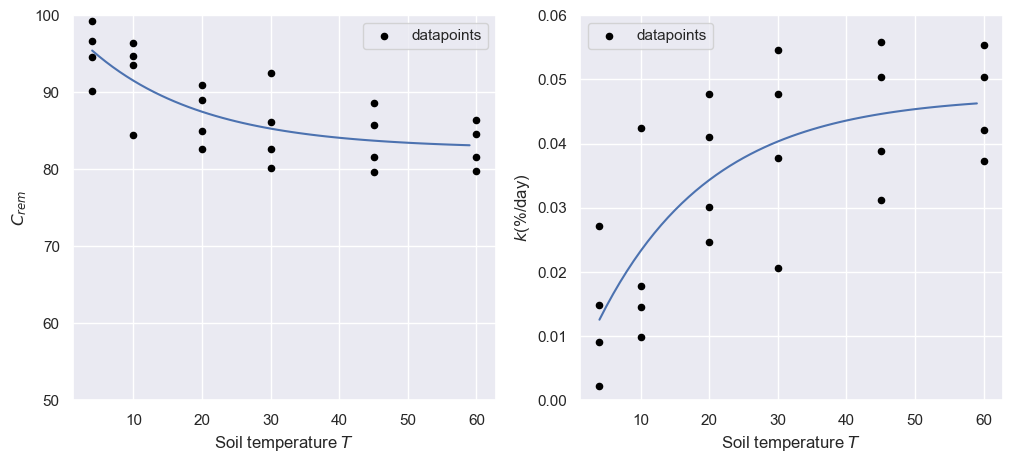

In [87]:
x = np.arange(4,60, 1)
y = [(82.67 + 16.27*np.exp(-0.061*T)) for T in x] # data from Nguyen2010, Table S2 (available in q10 dataset)

fig, ax = plt.subplots(1,2,figsize=(12,5))
axl = ax.ravel()
nguyen2010.plot(ax=axl[0], kind='scatter', x='Incubation temperature (°C)', y='Remaining C (%)', color='black', label="datapoints")
axl[0].plot(x,y)
axl[0].set_xlabel('Soil temperature $T$')
axl[0].set_ylabel('$C_{rem}$')
axl[0].set_ylim([50,100])

nguyen2010.plot(ax=axl[1], kind='scatter', x='Incubation temperature (°C)', y='[elias] Average annual decay rate (%/day)', color='black', label="datapoints")
y = [(100 - 82.67 - 16.27*np.exp(-0.061*T))/365 for T in x] # data from Nguyen2010, Table S2 (available in q10 dataset)
axl[1].plot(x,y)
axl[1].set_xlabel('Soil temperature $T$')
axl[1].set_ylabel('$k$(%/day)')
axl[1].set_ylim([0,0.06])
plt.show()

In other words, the relationship between biochar decay rates and soil temperature is here:

$$ k (\%/year) = 17.33 - 16.27 * e^{-0.061*T} $$

$$ k (\%/day) = 0.04748 - 0.04458 * e^{-0.061*T} $$

Which, can be used for converting between two tempeartures T1 and T2, as an equation that does not simplify (because of the constant, 17.33):

$$ \frac{k_2}{k_1} =  \frac{17.33 - 16.27 * e^{-0.061*T_2}}{17.33 - 16.27 * e^{-0.061*T_1}}  $$

Theoretically, we could decide to fit any other type of relation to that cloud of dots.

Important to note: the fit between decay and temperature is NOT the same function as for soil organic matter; and with that definition, the notion of Q10 (defined as exp(10b) in the model k = a exp(bT)) does not make sense.

In [76]:
def NgfT(T1, T2):
    '''from T1 to T2'''
    return (17.33 - 16.27 * np.exp(-0.061*T2)) / (17.33 - 16.27 * np.exp(-0.061*T1))

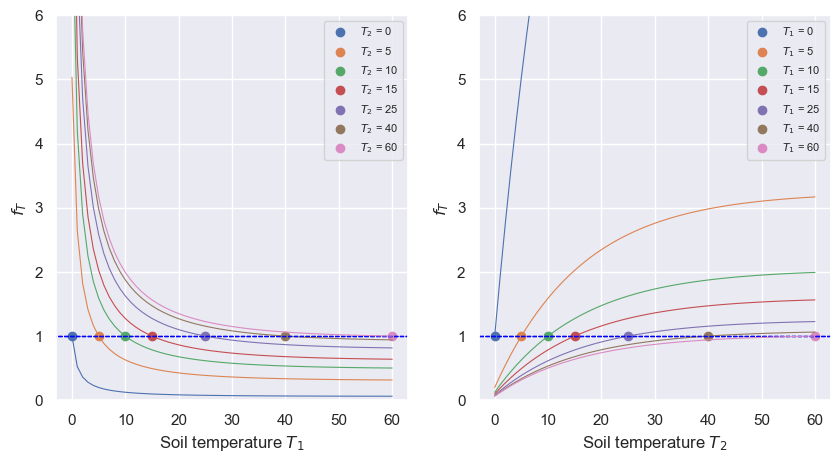

In [77]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+1, 1)
    y = [NgfT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+1, 1)
    y = [NgfT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)  

In [78]:
T = np.arange(0, 60, 10)
pairs = list(itertools.combinations(T, 2))
triples = list(itertools.combinations(T, 3))
ds_esa = test_symetry(pairs, NgfT)
dt_esa = test_transitivity(triples, NgfT)

In [80]:
ds_esa, dt_esa

(       pairs         s1        s2  diff
 0    (0, 10)   8.009133  0.124857   1.0
 1    (0, 20)  11.817552  0.084620   1.0
 2    (0, 30)  13.886860  0.072011   1.0
 3    (0, 40)  15.011220  0.066617   1.0
 4    (0, 50)  15.622142  0.064012   1.0
 5   (10, 20)   1.475509  0.677732   1.0
 6   (10, 30)   1.733878  0.576742   1.0
 7   (10, 40)   1.874263  0.533543   1.0
 8   (10, 50)   1.950541  0.512678   1.0
 9   (20, 30)   1.175105  0.850988   1.0
 10  (20, 40)   1.270248  0.787248   1.0
 11  (20, 50)   1.321944  0.756462   1.0
 12  (30, 40)   1.080966  0.925099   1.0
 13  (30, 50)   1.124959  0.888922   1.0
 14  (40, 50)   1.040698  0.960894   1.0,
          triples         s1        s2         s3  diff
 0    (0, 10, 20)   8.009133  1.475509  11.817552   1.0
 1    (0, 10, 30)   8.009133  1.733878  13.886860   1.0
 2    (0, 10, 40)   8.009133  1.874263  15.011220   1.0
 3    (0, 10, 50)   8.009133  1.950541  15.622142   1.0
 4    (0, 20, 30)  11.817552  1.175105  13.886860   1.0
 5    (

The figure above, must be compared to the previous ones, reproduced again below, (Woolf 2021; Woolf 2021 modified expression; Woolf 2021 with many substeps). It has the behavior we expect: it's bijective/transitive/monotonous.

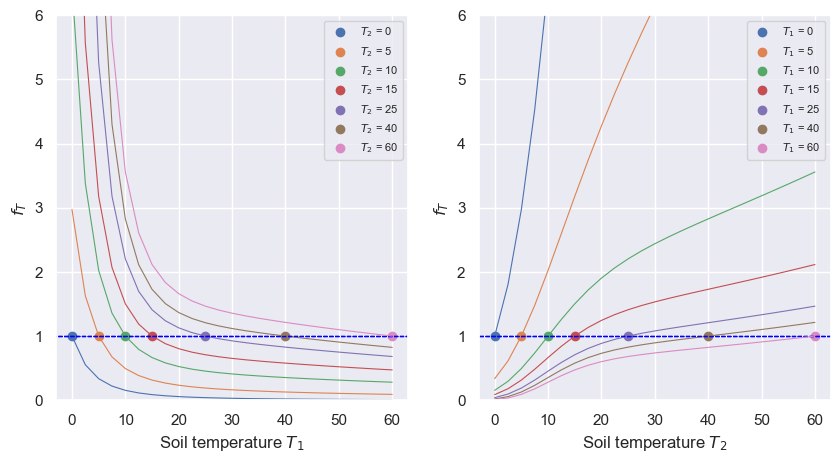

In [169]:
# we retrive the following functions defined in bs.applyQ10, slightly modified 
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)    

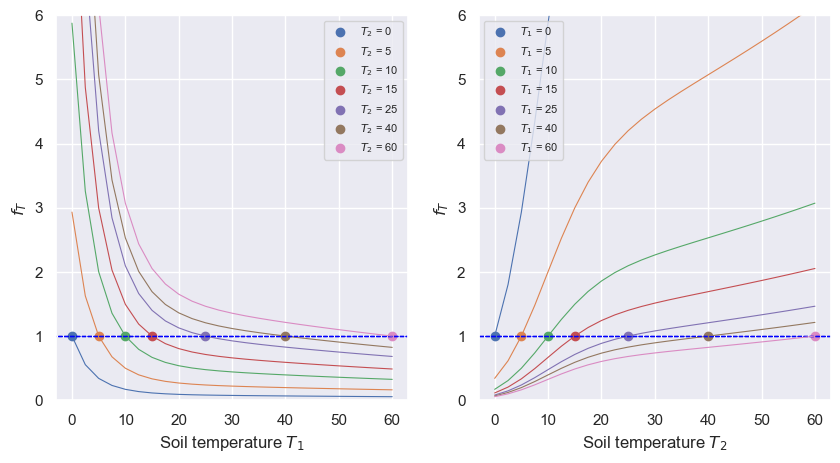

In [237]:
# Here, I modify the Woolf Q10 integral approach by adding a "small iteration" step so that temperature conversion converge
# Hypothesis: it will correct the shape of the curve for large jumps 
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

def stepwise_fT(T1,T2, s=0.001):
    '''Calculates the fT with Woolf2021 method and a stepwise approach, to have a bijection'''
    f=1
    sign = +1 if T1<T2 else -1
    x = np.arange(T1, T2, sign*s)
    for i in x:
        f=f*fT(i,i+sign*s)
    return f

fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [stepwise_fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [stepwise_fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)    

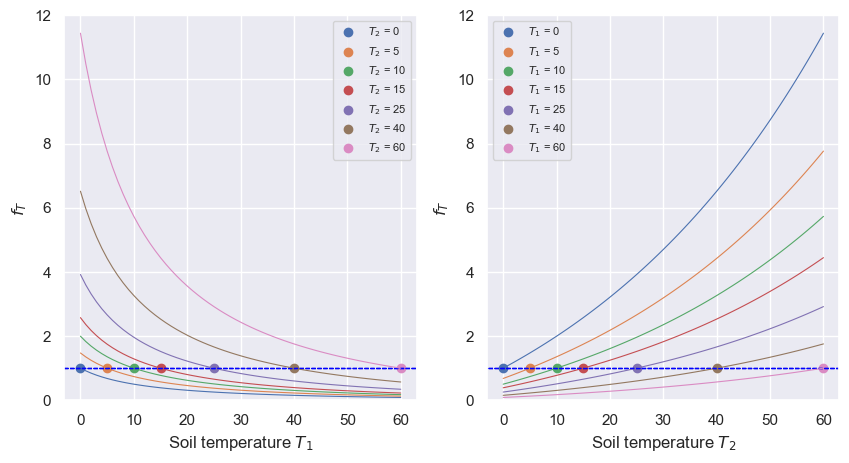

In [21]:
def custom2023_03_fT(T1, T2):
    '''from T1 to T2, using exponential relationship fitted on k_Y2 and Incubation temperature of whole dataset, by eye'''
    #return (0.7 * np.exp(0.0251*T2) - 0.6) / (0.7 * np.exp(0.0251*T1) - 0.6)
    return (0.9 * np.exp(0.0200*T2) - 0.7) / (0.9 * np.exp(0.0200*T1) - 0.7)


fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+1, 1)
    y = [custom2023_03_fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,12])

def q10_var2(x0=5):
    x = np.arange(0,60+1, 1)
    y = [custom2023_03_fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,12])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)  

In [17]:
T = np.arange(0, 60, 10)
pairs = list(itertools.combinations(T, 2))
triples = list(itertools.combinations(T, 3))
ds_esa = test_symetry(pairs, custom2023_03_fT)
dt_esa = test_transitivity(triples, custom2023_03_fT)

#### Recalculating Q10 from Nguyen2010

In [196]:
# for one biochar, oak-600, verify how Q10 values were calculated for each temperature jump, 
# and check also the other parameter a
oak600 = nguyen2010[(nguyen2010['Feedstock']=='oak') 
           & (nguyen2010['Pyrolysis temperature (°C)']==600)].copy()

In [245]:
def exp_q10(R2, T2, R1, T1):
    '''
    Calculates a Q10 value for 2 experimental observations, at T1 and T2
    '''
    return ((100-R2)/(100-R1))**(10/(T2-T1))

def exp_a(R2, T2, R1, T1):
    '''Calculates the constant `a` in the model k = a * exp (b*T) = a * Q10 ** (T/10)'''
    return (100-R1) / ( (exp_q10(R2, T2, R1, T1))**(T1/10) ), (100-R2) / ( (exp_q10(R2, T2, R1, T1))**(T2/10) )

def get_nguyen(T1, T2, feedstock='oak', pyr=600):
    '''
    Extracts the values from the nguyen2010
    '''
    nguyen2010i = nguyen2010.set_index(['Incubation temperature (°C)', 'Feedstock', 'Pyrolysis temperature (°C)'])
    R1 = nguyen2010i.xs((T1, feedstock, pyr))['Remaining C (%)']
    R2 = nguyen2010i.xs((T2, feedstock, pyr))['Remaining C (%)']
    return (R2, T2, R1, T1)

In [246]:
svar = get_nguyen(T1=20, T2=30, feedstock='oak', pyr=600)
exp_q10(*svar), exp_a(*svar), svar

(0.8333333333333334,
 (12.959999999999999, 12.959999999999997),
 (92.5, 30, 91.0, 20))

In [247]:
svar = get_nguyen(T1=10, T2=20, feedstock='oak', pyr=600)
exp_q10(*svar), exp_a(*svar), svar

(1.6981132075471708,
 (3.121111111111108, 3.1211111111111074),
 (91.0, 20, 94.7, 10))

In [264]:
combinations = q10data[['T_1', 'T_2', 'BC_class', 'BC_HHT']].iloc[0:20,:].copy()
combinations.replace(2, 4, inplace=True)
combinations.replace(12, 10, inplace=True)
combinations.replace(32.5, 30, inplace=True)
combinations.replace(42.5, 45, inplace=True)
combinations.replace(47.5, 45, inplace=True)
combinations.replace(57.5, 60, inplace=True)

In [292]:
# cannot reproduce the Q10 values reported in Lehmann's dataset, from the same original data
for i, r in combinations.iterrows():
    print(r['BC_class'], r['BC_HHT'])
    svar = get_nguyen(*r)
    print("decays and temperatures", svar)
    print("q10, a", exp_q10(*svar), exp_a(*svar)[0])
    print("")

corn 350
decays and temperatures (84.5, 10.0, 90.1, 4.0)
q10, a 2.111028869758243 7.342391296512717

corn 600
decays and temperatures (93.5, 10.0, 94.6, 4.0)
q10, a 1.362069687820336 4.7721493680706475

oak 350
decays and temperatures (96.4, 10.0, 96.7, 4.0)
q10, a 1.1560614908928495 3.1140212076605387

oak 600
decays and temperatures (94.7, 10.0, 99.2, 4.0)
q10, a 23.369161917822026 0.2267946115756106

corn 350
decays and temperatures (85.0, 20.0, 84.5, 10.0)
q10, a 0.967741935483871 16.016666666666666

corn 600
decays and temperatures (82.6, 20.0, 93.5, 10.0)
q10, a 2.6769230769230776 2.4281609195402294

oak 350
decays and temperatures (89.0, 20.0, 96.4, 10.0)
q10, a 3.0555555555555602 1.1781818181818144

oak 600
decays and temperatures (91.0, 20.0, 94.7, 10.0)
q10, a 1.6981132075471708 3.121111111111108

corn 350
decays and temperatures (80.1, 30.0, 85.0, 20.0)
q10, a 1.326666666666667 8.522512057776312

corn 600
decays and temperatures (82.6, 30.0, 82.6, 20.0)
q10, a 1.0 17.4000000

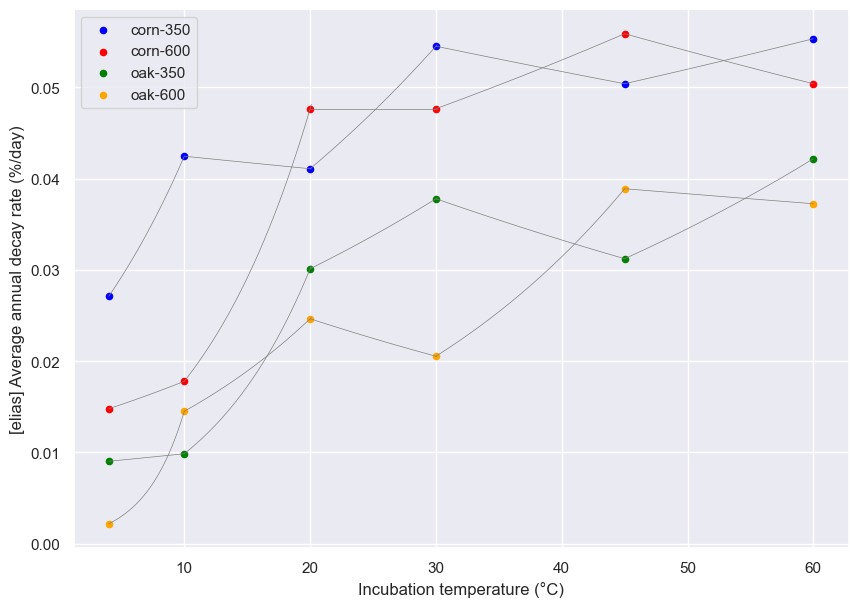

In [293]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
nguyen2010i = nguyen2010.set_index(['Feedstock', 'Pyrolysis temperature (°C)'])

# plotting the decay rates as a function of temperature, for each feedstock
yy = '[elias] Average annual decay rate (%/day)' # 'Remaining C (%)' #
nguyen2010i.xs(('corn', 350)).plot(ax=ax, kind='scatter', 
                                  x='Incubation temperature (°C)', 
                                  y=yy, color='blue', label="corn-350")
nguyen2010i.xs(('corn', 600)).plot(ax=ax, kind='scatter', 
                                  x='Incubation temperature (°C)', 
                                  y=yy, color='red',label="corn-600")
nguyen2010i.xs(('oak', 350)).plot(ax=ax, kind='scatter', 
                                  x='Incubation temperature (°C)', 
                                  y=yy, color='green',label="oak-350")
nguyen2010i.xs(('oak', 600)).plot(ax=ax, kind='scatter', 
                                  x='Incubation temperature (°C)', 
                                  y=yy, color='orange', label="oak-600")

# now calculating and plotting, for each temperature interval, the Q10 and a value, and plotting it as a line on the interval
# as implied by the notion of Q_10 at a T_avg 
for i, r in combinations.iterrows():
    #print(r['BC_class'], r['BC_HHT'])
    svar = get_nguyen(*r)
    T1 = svar[3]
    T2 = svar[1]
    q10 = exp_q10(*svar)
    a = exp_a(*svar)[0]
    xT = np.arange(T1, T2+0.1,0.1)
    yT = [a*q10**(T/10)/365 for T in xT]
    plt.plot(xT, yT, lw=0.5, color="grey")


plt.show()

The above figure does not make any sense; but it's what we do in the Q10 dataset derived from Lehmann2015, namely:
- calculating a Q10 value for every consecutive temperatures, using an exponentially increasing functio
- on a dataset that does not follow that same exponential trend

### Conclusion

* We have to drop the notion of Q10 for biochar, since the temperature-sensitivity of biochar decay does not follow the standard model. 
* We should work directly with the equation obtained from curve fitting between decay and temperature.
* We should include more data in that temperature sensitivity, and look at the effect of time on the relationship.

## Data from Fang2014

Fang2014 https://doi.org/10.1016/j.agee.2014.02.018 has 30 observations, eucalyptus wood, at two pyrolysis temperatures (450 and 550), in 4 types of soils, at 3 incubation temperatures (20, 40, 60); and 1 extra set of observations for higher application rate (only one soil type). Leading to a total of 24+6 observations. Incubations lasted for 730 days, i.e. 2 years.


Since the data is available at several temperatures; we can use it for investigating temperature sensitivity of biochar decay, and also investigate influence of time (since several measurements are made). We can also use it to check/validate the previously availble temperature correction method.

Let's go

1. Look at the data: decay over time, C_loss over time
2. Extract some features: - average decay rate over Y1, - average decay rate over Y2, - average decay rate, overall, - C_loss at Y1, C_loss at Y2

Note: average decay rates over a year, are linked to cumulative C lost over time period.

$ k_{Y_1} = C_{loss}(Y_1) / 365 $ and $ k_{Y_2} = \left( C_{loss}(Y_2) - C_{loss}(Y_1) \right)  / 365 $ and $ k_{Y_1+2} = C_{loss}(Y_2) / 2/365 $ 

In [5]:
fang_id=5
fang_obs=[ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
fang_data = data[ data['ID_obs'].isin(fang_obs)]
fang_meta = metadata[metadata.index.isin(fang_obs)]

In [91]:
months_cutoffs, sets_incubations, sets_labels = bs.classify_observations_by_duration(fang_meta, months_cutoffs=[0])

color_list = []
marker_list= []
for i in sets_incubations[0]:
    T = fang_meta['IncubationTemperature'].loc[i]
    if T == 60.0:
        color_list.append(sns.color_palette("hls", 8)[0]) # red
    if T == 40.0:
        color_list.append(sns.color_palette("hls", 8)[1]) # orange
    if T == 20.0:
        color_list.append(sns.color_palette("hls", 8)[2]) # green
        
    HTT = fang_meta['HHT'].loc[i] # not working for markers, cf function to plot, j // len...
    if HTT == 450.:
        marker_list.append('x')
    if HTT == 550.:
        marker_list.append('^')
sns.color_palette("hls", 8)

Incubation longer than 0 months --->  30  observations


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

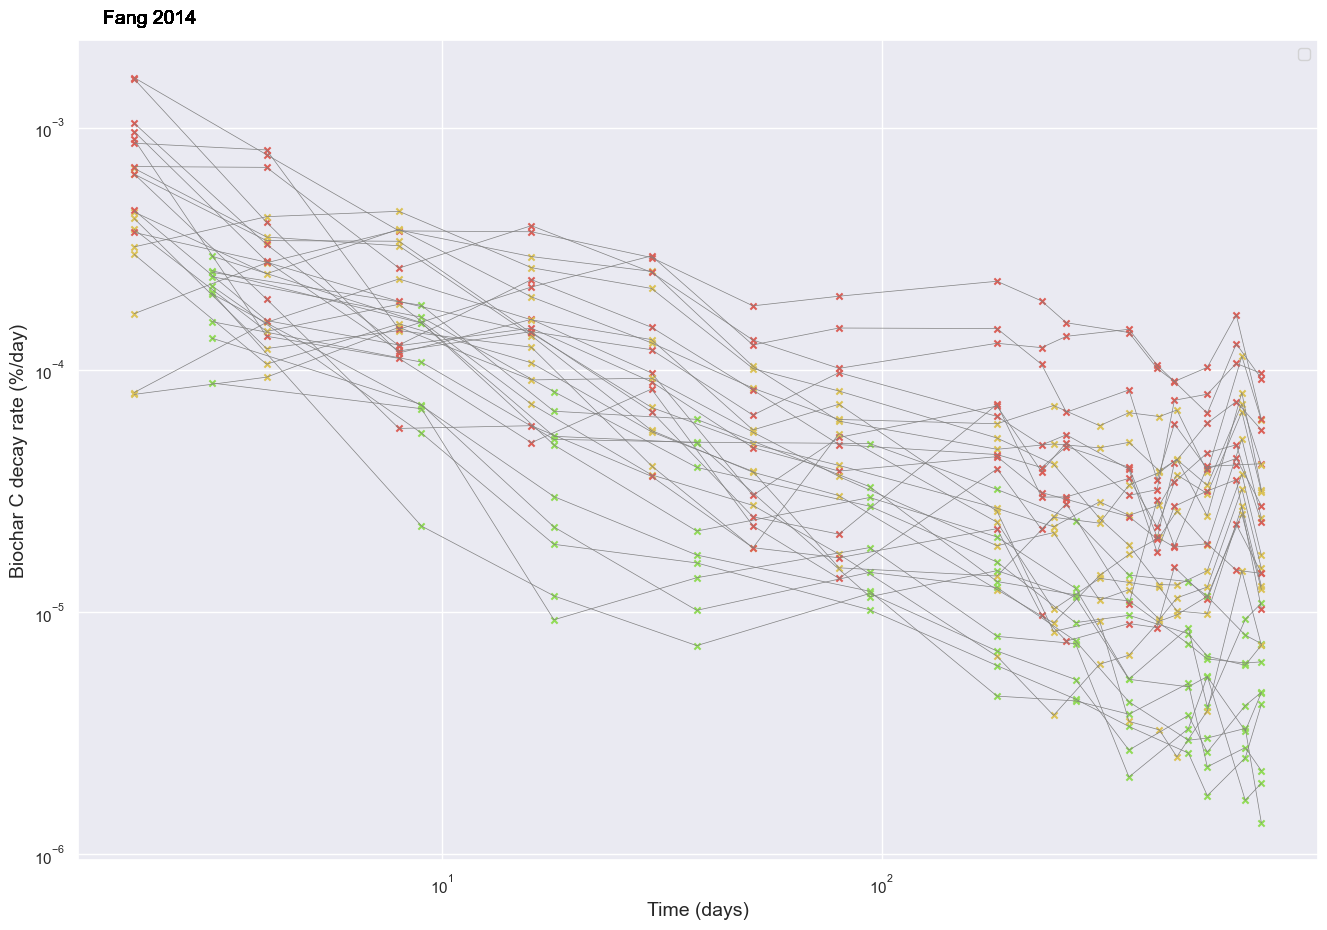

In [92]:
fig, axes, axl = bs.plot_timeseries_by_group(fang_data, fang_meta, sets_incubations, 'k_bc_reld', titles=['Fang 2014'],
                                             ylabel="Biochar C decay rate (%/day)", factor=1, line=True, 
                                             color_list=color_list, marker_list=marker_list,
                                             nrows=1, ncols=1, saveFig=False)

[axl[i].set_yscale('log') for i in range(len(axl))] # y-log scale
[axl[i].set_xscale('log') for i in range(len(axl))] # x-log scale
plt.legend('')
plt.show()

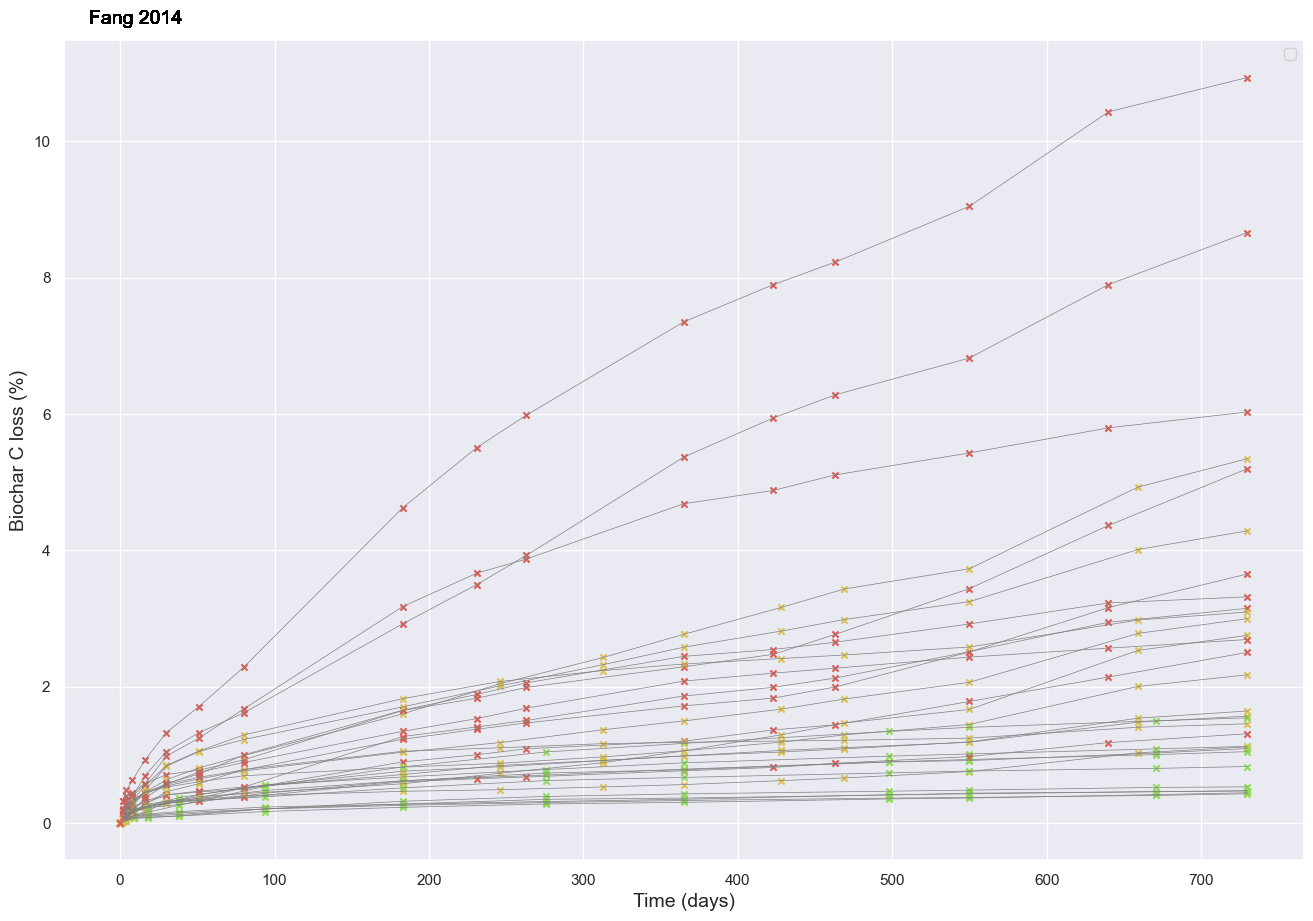

In [93]:
fig, axes, axl = bs.plot_timeseries_by_group(fang_data, fang_meta, sets_incubations, 'C_bc_loss_rel', titles=['Fang 2014'],
                                             ylabel="Biochar C loss (%)", factor=100, line=True, 
                                             color_list=color_list, marker_list=marker_list,
                                             nrows=1, ncols=1, saveFig=False)

#[axl[i].set_yscale('log') for i in range(len(axl))] # y-log scale
#[axl[i].set_xscale('log') for i in range(len(axl))] # x-log scale
plt.legend('')
plt.show()

In [6]:
# getting decay rates
fang_tmp = (pd.pivot_table(fang_data, columns=['ID_obs'], values=['C_bc_loss_rel'], index=['time'])*100).loc[[365, 730],:].T

fang_q10 = pd.DataFrame(index=fang_meta.index, columns=['IncubationTemperature', 'HHT', 'Soil', 'k_Y1', 'k_Y2', 'k_Y0-2', ])
fang_q10['IncubationTemperature'] = fang_meta['IncubationTemperature']
fang_q10['HHT'] = fang_meta['HHT']
fang_q10['Soil'] = fang_meta['SoilOrigin']+'-'+fang_meta['ApplicationRate'].astype(str)
fang_q10['k_Y1'] = (fang_tmp[[365]]/365).values.flatten()
fang_q10['k_Y2'] = ((fang_tmp[[730]].values.flatten()-fang_tmp[[365]].values.flatten())/365)
fang_q10['k_Y0-2'] = (fang_tmp[[730]]/730).values.flatten()
fang_q100 = fang_q10.set_index(['HHT', 'Soil'])


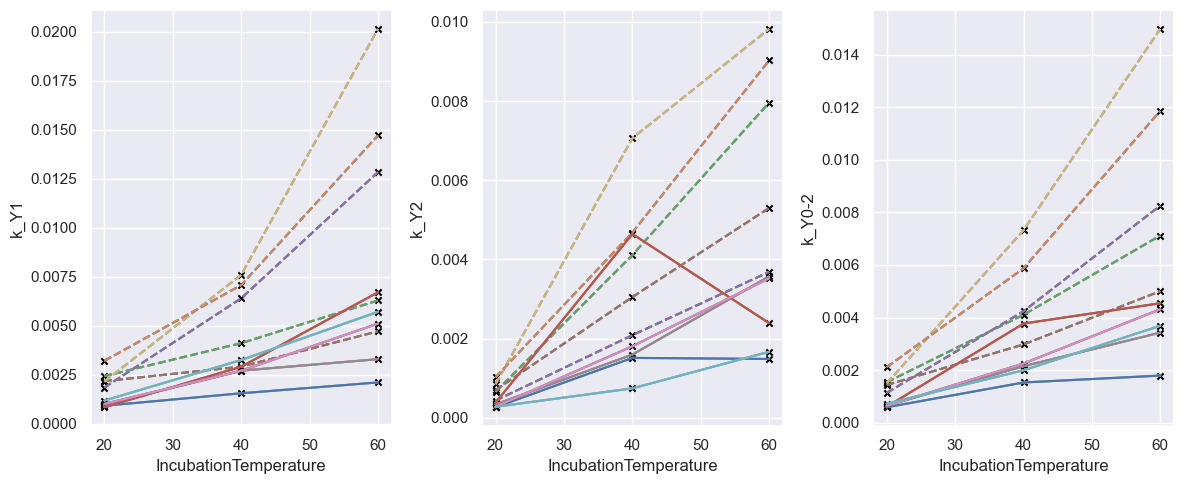

In [7]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
axl = ax.ravel()
fang_q100.sort_index(inplace=True)
for i in fang_q100.index:
    x = fang_q100.loc[i, 'IncubationTemperature'].values
    y1 = fang_q100.loc[i].k_Y1.values
    y2 = fang_q100.loc[i].k_Y2.values
    y02 = fang_q100.loc[i]['k_Y0-2'].values
    if i[0] == 450.:
        linst = 'dashed'
    else:
        linst = 'solid'
    axl[0].plot(x, y1, ls=linst)
    axl[1].plot(x, y2, ls=linst)
    axl[2].plot(x, y02, ls=linst)
    
fang_q10.plot(ax=axl[0], kind='scatter', x='IncubationTemperature', y='k_Y1', color='black', marker='x')
fang_q10.plot(ax=axl[1], kind='scatter', x='IncubationTemperature', y='k_Y2', color='black', marker='x')
fang_q10.plot(ax=axl[2], kind='scatter', x='IncubationTemperature', y='k_Y0-2', color='black', marker='x')

plt.tight_layout()
plt.show()

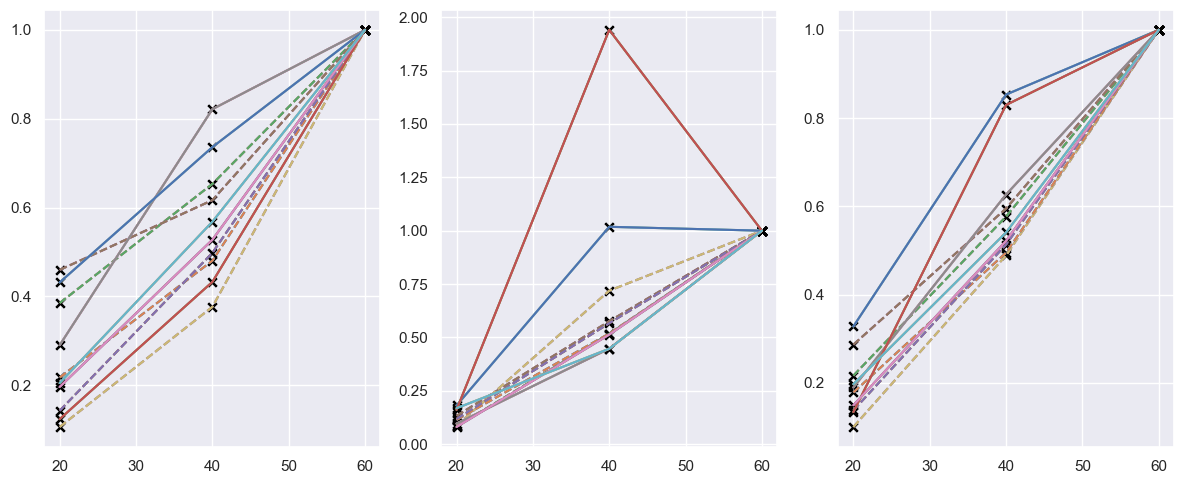

In [100]:
# with T_ref = 60
iTref = 2
fig, ax = plt.subplots(1,3,figsize=(12,5))
axl = ax.ravel()
fang_q100.sort_index(inplace=True)
for i in fang_q100.index:
    x = fang_q100.loc[i, 'IncubationTemperature'].values
    y1 = fang_q100.loc[i].k_Y1.values
    y2 = fang_q100.loc[i].k_Y2.values
    y02 = fang_q100.loc[i]['k_Y0-2'].values
    if i[0] == 450.:
        linst = 'dashed'
    else:
        linst = 'solid'
    axl[0].plot(x, y1/y1[iTref], ls=linst)
    axl[1].plot(x, y2/y2[iTref], ls=linst)
    axl[2].plot(x, y02/y02[iTref], ls=linst)
    
    axl[0].scatter(x, y1/y1[iTref], color='black', marker='x')
    axl[1].scatter(x, y2/y2[iTref], color='black', marker='x')
    axl[2].scatter(x, y02/y02[iTref], color='black', marker='x')
    
plt.tight_layout()
plt.show()

Fang data plotted with Nguyen data / Normalized to 60 degrees

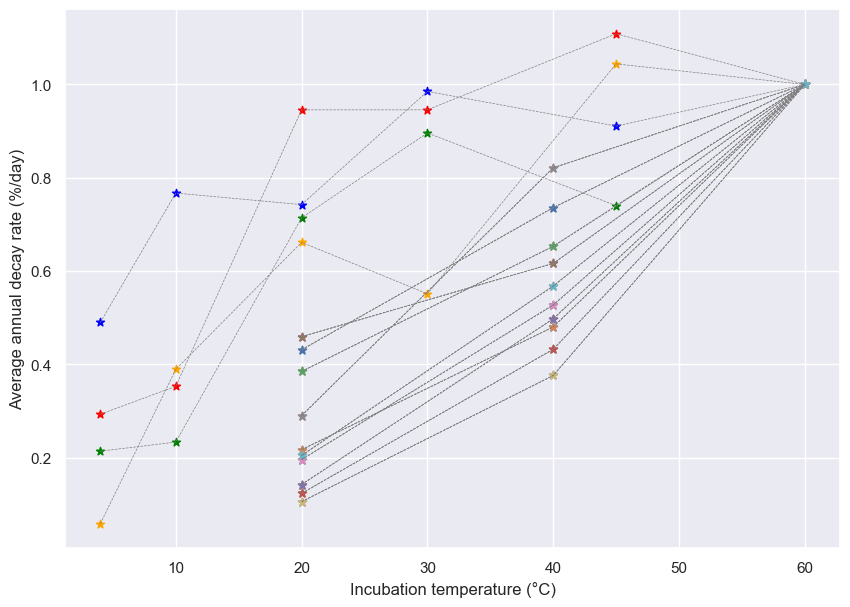

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
nguyen2010i = nguyen2010.set_index(['Feedstock', 'Pyrolysis temperature (°C)'])
iTref = -1 # last value; corresponds to 60 deg, in both Fang & Nguyen

# plotting the decay rates as a function of temperature, for each feedstock
xx = 'Incubation temperature (°C)'
yy = '[elias] Average annual decay rate (%/day)' # 'Remaining C (%)'
colors = ['blue', 'red', 'green', 'orange']
for i, obs in enumerate([('corn', 350), ('corn', 600), ('oak', 350), ('oak', 600)]):
    x = nguyen2010i.xs(obs)[xx]
    y = nguyen2010i.xs(obs)[yy]
    ax.scatter(x, y/y[iTref], marker='*', c=colors[i], label=str(obs[0]+'-'+str(obs[1])) )
    ax.plot(x, y/y[iTref], ls='dashed', lw=0.5, color='grey')
    
for i in fang_q100.index:
    x = fang_q100.loc[i, 'IncubationTemperature'].values
    y1 = fang_q100.loc[i].k_Y1.values
    y2 = fang_q100.loc[i].k_Y2.values
    y02 = fang_q100.loc[i]['k_Y0-2'].values
    #ax.scatter(x, y1, color='black', marker='x')
    #ax.scatter(x, y2, color='black', marker='x')
    ax.scatter(x, y1/y1[iTref], marker='*', label=str(i[0])+'-'+i[1][0:5] )
    ax.plot(x, y1/y1[iTref], ls='dashed', lw=0.5, color='grey')
    
ax.set_xlabel(xx)
ax.set_ylabel(yy[8:])
#plt.legend()
plt.show()

Fang data plotted with Nguyen data / Absolute values

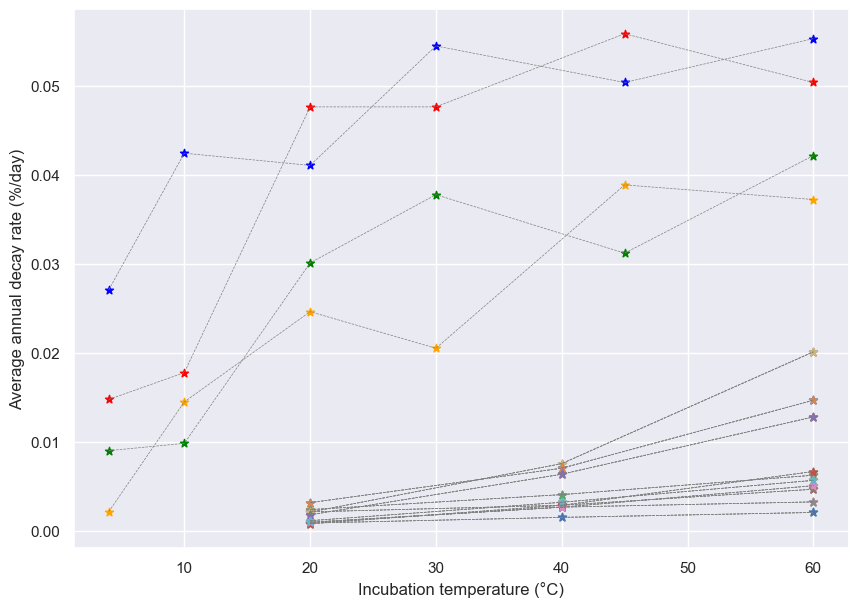

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
nguyen2010i = nguyen2010.set_index(['Feedstock', 'Pyrolysis temperature (°C)'])
iTref = -1 # last value; corresponds to 60 deg, in both Fang & Nguyen

# plotting the decay rates as a function of temperature, for each feedstock
xx = 'Incubation temperature (°C)'
yy = '[elias] Average annual decay rate (%/day)' # 'Remaining C (%)'
colors = ['blue', 'red', 'green', 'orange']
for i, obs in enumerate([('corn', 350), ('corn', 600), ('oak', 350), ('oak', 600)]):
    x = nguyen2010i.xs(obs)[xx]
    y = nguyen2010i.xs(obs)[yy]
    ax.scatter(x, y/1, marker='*', c=colors[i], label=str(obs[0]+'-'+str(obs[1])) )
    ax.plot(x, y/1, ls='dashed', lw=0.5, color='grey')
    
for i in fang_q100.index:
    x = fang_q100.loc[i, 'IncubationTemperature'].values
    y1 = fang_q100.loc[i].k_Y1.values
    y2 = fang_q100.loc[i].k_Y2.values
    y02 = fang_q100.loc[i]['k_Y0-2'].values
    #ax.scatter(x, y1, color='black', marker='x')
    #ax.scatter(x, y2, color='black', marker='x')
    ax.scatter(x, y1/1, marker='*', label=str(i[0])+'-'+i[1][0:5] )
    ax.plot(x, y1/1, ls='dashed', lw=0.5, color='grey')
    
ax.set_xlabel(xx)
ax.set_ylabel(yy[8:])
#plt.legend()
plt.show()

## Average of r(T) rather than average of Q10(T)

In [2]:
from scipy import integrate as sci

In [19]:
def f(x):
    return np.exp(np.cos(-2 * x * np.pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = sci.quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 17.864264 (+-1.55117e-11)


In [83]:
def r(T, Tref):
    '''r(T) as combination of Q10(T) and definition of Q10'''
    a= 1.1
    b= 12.0
    c= -0.19
    # return np.exp((T)/10*np.log(a+b*np.exp(c*(T)))) # no Tref >> WEIRD
    return np.exp((T-Tref)/10*np.log(a+b*np.exp(c*(T)))) # Tref only in outer power >> NOT SYM, NOT TR
    # return np.exp((T-Tref)/10*np.log(a+b*np.exp(c*(T-Tref)/10))) # Tref in both power & exp, as (T-T-ref)/10 >> NOT SYM, NOT TR
    

def r_avg(T1, T2):
    if T1 == T2:
        return 1 
    else:
        res, err = sci.quad(r, T1, T2, args=(T1))/(T2-T1)
        return res

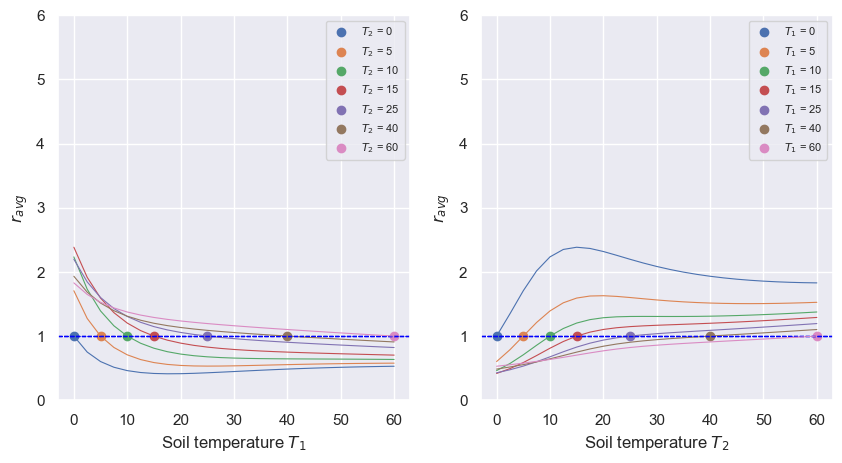

In [84]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [r_avg(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$r_{avg}$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [r_avg(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$r_{avg}$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)    

In [85]:
T = np.arange(0, 60, 10)
pairs = list(itertools.combinations(T, 2))
triples = list(itertools.combinations(T, 3))
ds_esa = test_symetry(pairs, r_avg)
dt_esa = test_transitivity(triples, r_avg)

In [72]:
ds_esa

pairs        s1        s2      diff
0     (0, 5)  1.706617  0.602956  1.029014
1    (0, 10)  2.234013  0.461901  1.031893
2    (0, 15)  2.384653  0.417482  0.995549
3    (0, 20)  2.318178  0.414020  0.959772
4    (0, 25)  2.197029  0.427837  0.939971
..       ...       ...       ...       ...
61  (40, 50)  1.050108  0.952351  1.000072
62  (40, 55)  1.075855  0.930094  1.000646
63  (45, 50)  1.024507  0.976166  1.000089
64  (45, 55)  1.049555  0.953253  1.000491
65  (50, 55)  1.024325  0.976399  1.000150

[66 rows x 4 columns]

In [73]:
dt_esa

triples        s1        s2        s3      diff
0      (0, 5, 10)  1.706617  1.391755  2.234013  1.063196
1      (0, 5, 15)  1.706617  1.592542  2.384653  1.139729
2      (0, 5, 20)  1.706617  1.629012  2.318178  1.199261
3      (0, 5, 25)  1.706617  1.601014  2.197029  1.243642
4      (0, 5, 30)  1.706617  1.563234  2.085123  1.279465
..            ...       ...       ...       ...       ...
215  (35, 50, 55)  1.077187  1.024325  1.103561  0.999844
216  (40, 45, 50)  1.024975  1.024507  1.050108  0.999987
217  (40, 45, 55)  1.024975  1.049555  1.075855  0.999919
218  (40, 50, 55)  1.050108  1.024325  1.075855  0.999811
219  (45, 50, 55)  1.024507  1.024325  1.049555  0.999879

[220 rows x 5 columns]

## Multiple approaches, synthesis

### Lars Elsgaard approach

Email with Lars:

I plotted for two levels of Ea, i.e., 30 kJ mol-1 for decomposition of labile organic compounds such as glucose and 70 kJ mol-1 for tannins (Davidson and Janssens, 2006)


Davidson EA, Jannsens IA. 2006. Temperature sensitivity of soil carbon decomposition and feedbacks to climate change. Nature 440:165–73 https://www.nature.com/articles/nature04514

Equations from Lars:

$$ k(T) = A e^{  \frac{- E_a}{RT} }  $$

$$ Q_{10}(T) = k(T+10)/k(T) =  e^{  \frac{10 E_a}{RT(T+10)} }  $$


*What is the relationship between two decay rates at two different temperatures?*

Give two soil temperatures, $T_1$ and $T_2$, and the associated decay rates, $k_1$ and $k_2$, the decay rates are link as follow:

$$ k_2 = k_1 * e^{  \frac{- E_a}{RT_2} } /  e^{  \frac{- E_a}{RT_1}} = k_1 * e^ { \frac{- E_a}{R} (T_2^{-1} - T_1^{-1}) }$$ 

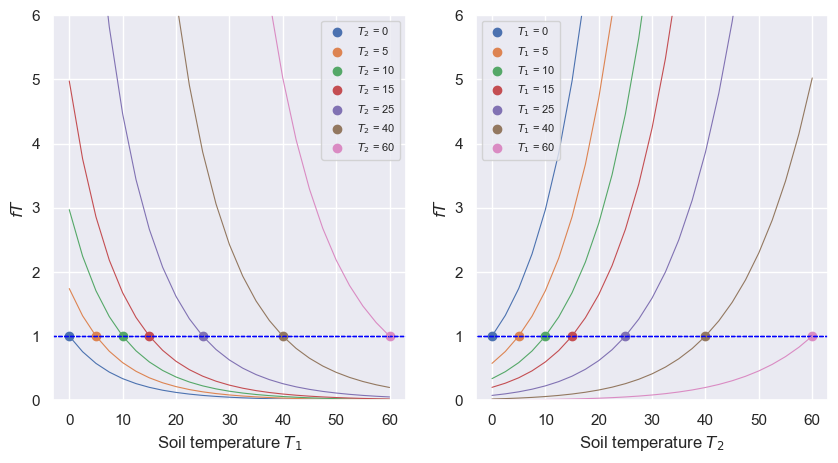

In [48]:
def Q10_Lars(T):
    '''
    Q10 relation, derived from an Arhenius law with activation energy.
    '''
    Ea = 70 *1000 # J/mol
    R = 8.31446261815324 # J K−1 mol−1
    Ti = T + 273.15
    return np.exp(10*Ea/R/Ti/(Ti+10))

def fT_Lars(T1, T2, Ea=70):
    '''calculate the fT ratio of the decay rates k2 / k1, to use to convert from k1 at T1 to k2 at T2.
    '''
    EaK = 70 *1000 # J/mol
    R = 8.31446261815324 # J K−1 mol−1
    T1i = T1 + 273.15
    T2i = T2 + 273.15
    return  np.exp(-EaK/R*(1/T2i - 1/T1i))

fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT_Lars(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$fT$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT_Lars(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$fT$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 5, 10, 15, 25, 40, 60]:
    q10_var(x0)
    q10_var2(x0)    

In [61]:
fT_Lars(10, 20, 70)

2.757529958955721

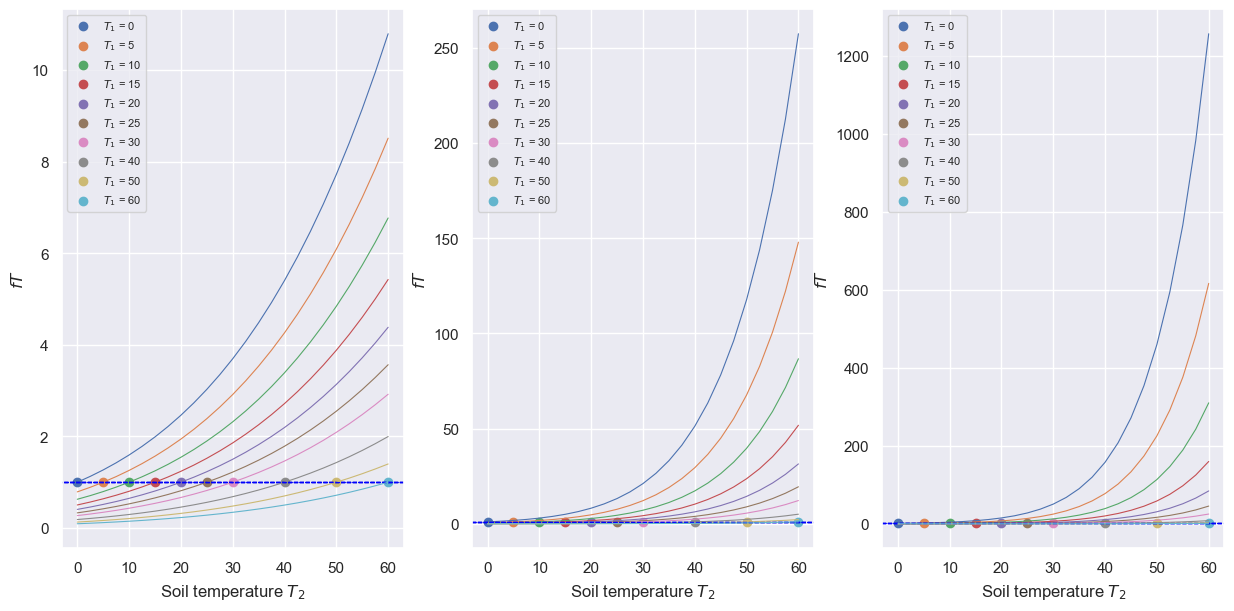

In [62]:
def Q10_Lars(T, Ea=70):
    '''
    Q10 relation, derived from an Arhenius law with activation energy.
    '''
    EaK = Ea *1000 # J/mol
    R = 8.31446261815324 # J K−1 mol−1
    Ti = T + 273.15
    return np.exp(10*EaK/R/Ti/(Ti+10))

def fT_Lars(T1, T2, Ea=70):
    '''calculate the fT ratio of the decay rates k2 / k1, to use to convert from k1 at T1 to k2 at T2.
    '''
    EaK = Ea *1000 # J/mol
    R = 8.31446261815324 # J K−1 mol−1
    T1i = T1 + 273.15
    T2i = T2 + 273.15
    return  np.exp(-EaK/R*(1/T2i - 1/T1i))

fig, ax = plt.subplots(1,3,figsize=(15,7))
axl = ax.ravel()

def q10_var2(x0=5, Ea=70, i=0):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT_Lars(x0, i, Ea) for i in x] # plot inverse relationship
    axl[i].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[i].plot(x, y, lw=0.8)
    axl[i].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[i].set_xlabel('Soil temperature $T_{2}$')
    axl[i].set_ylabel('$fT$')
    axl[i].legend(fontsize=8)
    #axl[i].set_ylim([0,2])
    
for x0 in [0, 5, 10, 15, 20, 25, 30, 40, 50, 60]:
    q10_var2(x0, 30, 0)
    q10_var2(x0, 70, 1)
    q10_var2(x0, 90, 2)

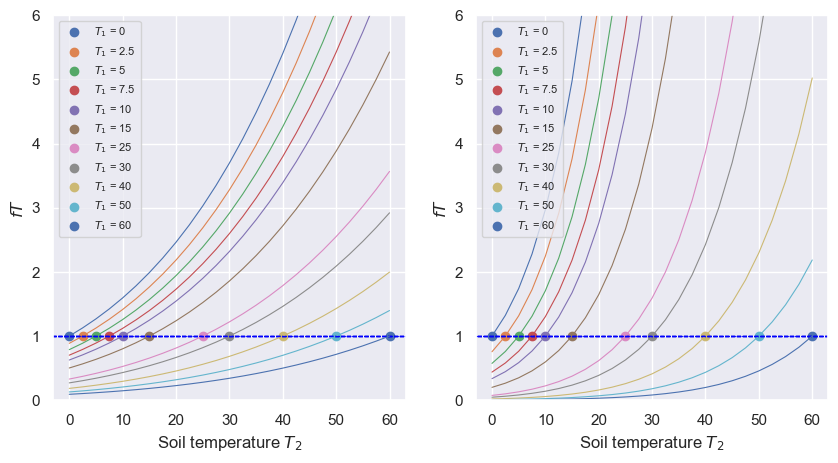

In [77]:
def Q10_Lars(T, Ea=70):
    '''
    Q10 relation, derived from an Arhenius law with activation energy.
    '''
    EaK = Ea *1000 # J/mol
    R = 8.31446261815324 # J K−1 mol−1
    Ti = T + 273.15
    return np.exp(10*EaK/R/Ti/(Ti+10))

def fT_Lars(T1, T2, Ea=70):
    '''calculate the fT ratio of the decay rates k2 / k1, to use to convert from k1 at T1 to k2 at T2.
    '''
    EaK = Ea *1000 # J/mol
    R = 8.31446261815324 # J K−1 mol−1
    T1i = T1 + 273.15
    T2i = T2 + 273.15
    return  np.exp(-EaK/R*(1/T2i - 1/T1i))

fig, ax = plt.subplots(1,2,figsize=(10, 5))
axl = ax.ravel()

def q10_var2(x0=5, Ea=70, i=0):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT_Lars(x0, i, Ea) for i in x] # plot inverse relationship
    axl[i].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[i].plot(x, y, lw=0.8)
    axl[i].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[i].set_xlabel('Soil temperature $T_{2}$')
    axl[i].set_ylabel('$fT$')
    axl[i].legend(fontsize=8)
    axl[i].set_ylim([0,6])
    
for x0 in [0, 2.5, 5, 7.5, 10, 15, 25, 30, 40, 50, 60]:
    q10_var2(x0, 30, 0)
    q10_var2(x0, 70, 1)
    
fig.savefig('simulations/temperature-correction/fT_Arrhenius70kJ_Lars.png', dpi=600)

### Woolf, original

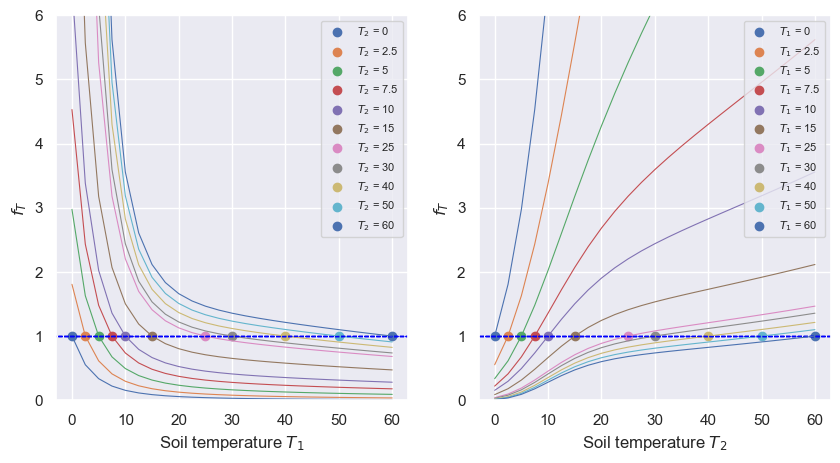

In [75]:
# we retrive the following functions defined in bs.applyQ10, slightly modified 
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8, loc="upper right")
    axl[1].set_ylim([0,6])
    
for x0 in [0, 2.5, 5, 7.5, 10, 15, 25, 30, 40, 50, 60]:
    q10_var(x0)
    q10_var2(x0)    
    
fig.savefig('simulations/temperature-correction/fT_Woolf2021.png', dpi=600)

### Step-wise modified Woolf

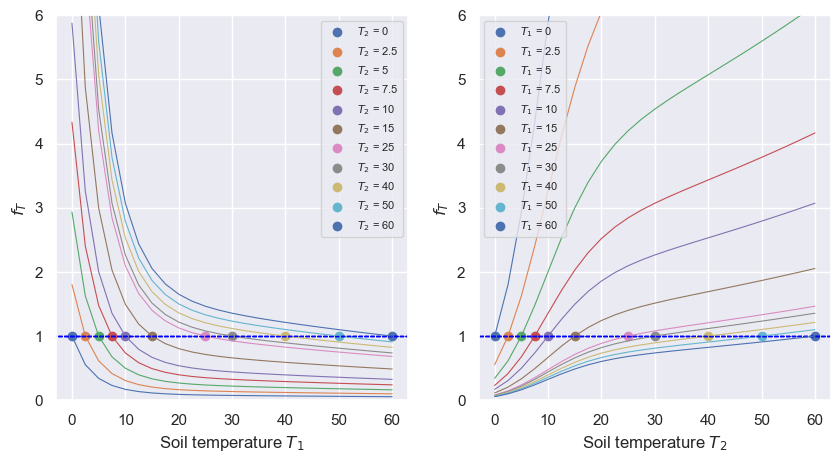

In [70]:
# Here, I modify the Woolf Q10 integral approach by adding a "small iteration" step so that temperature conversion converge
# Hypothesis: it will correct the shape of the curve for large jumps 
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

def stepwise_fT(T1,T2, s=0.001):
    '''Calculates the fT with Woolf2021 method and a stepwise approach, to have a bijection'''
    f=1
    sign = +1 if T1<T2 else -1
    x = np.arange(T1, T2, sign*s)
    for i in x:
        f=f*fT(i,i+sign*s)
    return f

fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [stepwise_fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,6])

def q10_var2(x0=5):
    x = np.arange(0,60+2.5, 2.5)
    y = [stepwise_fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 2.5, 5, 7.5, 10, 15, 25, 30, 40, 50, 60]:
    q10_var(x0)
    q10_var2(x0)
    
fig.savefig('simulations/temperature-correction/fT_stepWiseWoolf2021.png', dpi=600)

### Eye fit on decay data

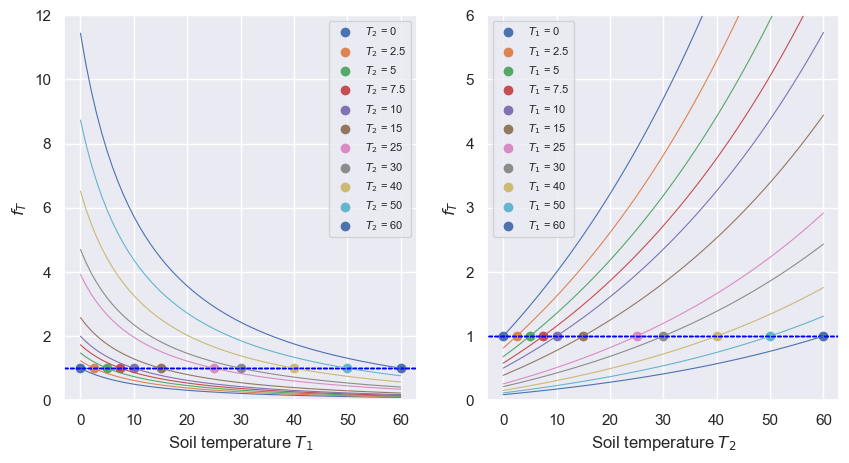

In [76]:
def custom2023_03_fT(T1, T2):
    '''from T1 to T2, using exponential relationship fitted on k_Y2 and Incubation temperature of whole dataset, by eye'''
    #return (0.7 * np.exp(0.0251*T2) - 0.6) / (0.7 * np.exp(0.0251*T1) - 0.6)
    return (0.9 * np.exp(0.0200*T2) - 0.7) / (0.9 * np.exp(0.0200*T1) - 0.7)


fig, ax = plt.subplots(1,2,figsize=(10,5))
axl = ax.ravel()

def q10_var(x0=5):
    x = np.arange(0,60+1, 1)
    y = [custom2023_03_fT(i, x0) for i in x] # change one, the other being constant
    axl[0].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[0].plot(x, y, lw=0.8)
    axl[0].scatter(x0,1, label="$T_{2}$ = "+str(x0))
    axl[0].set_xlabel('Soil temperature $T_{1}$')
    axl[0].set_ylabel('$f_T$')
    axl[0].legend(fontsize=8)
    axl[0].set_ylim([0,12])

def q10_var2(x0=5):
    x = np.arange(0,60+1, 1)
    y = [custom2023_03_fT(x0, i) for i in x] # plot inverse relationship
    axl[1].axhline(y=1, color='blue', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[1].plot(x, y, lw=0.8)
    axl[1].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[1].set_xlabel('Soil temperature $T_{2}$')
    axl[1].set_ylabel('$f_T$')
    axl[1].legend(fontsize=8)
    axl[1].set_ylim([0,6])
    
for x0 in [0, 2.5, 5, 7.5, 10, 15, 25, 30, 40, 50, 60]:
    q10_var(x0)
    q10_var2(x0)
    
fig.savefig('simulations/temperature-correction/fT_datasetEyefit.png', dpi=600)

## Temperature correction, for manuscript

We shall plot, for the 3 approaches:
* fT abacus
* effect on real decay data: but how?

5 Woolf 0.6662102871379667
5 WoolfStepwise 0.7441581528900312
5 DataFit 0.7534433362994967
15 Woolf 0.9498585676177195
15 WoolfStepwise 0.9536153156509418
15 DataFit 0.8451784182435559
30 Woolf 0.9833464272747845
30 WoolfStepwise 0.9834696739881504
30 DataFit 0.8979986454209502


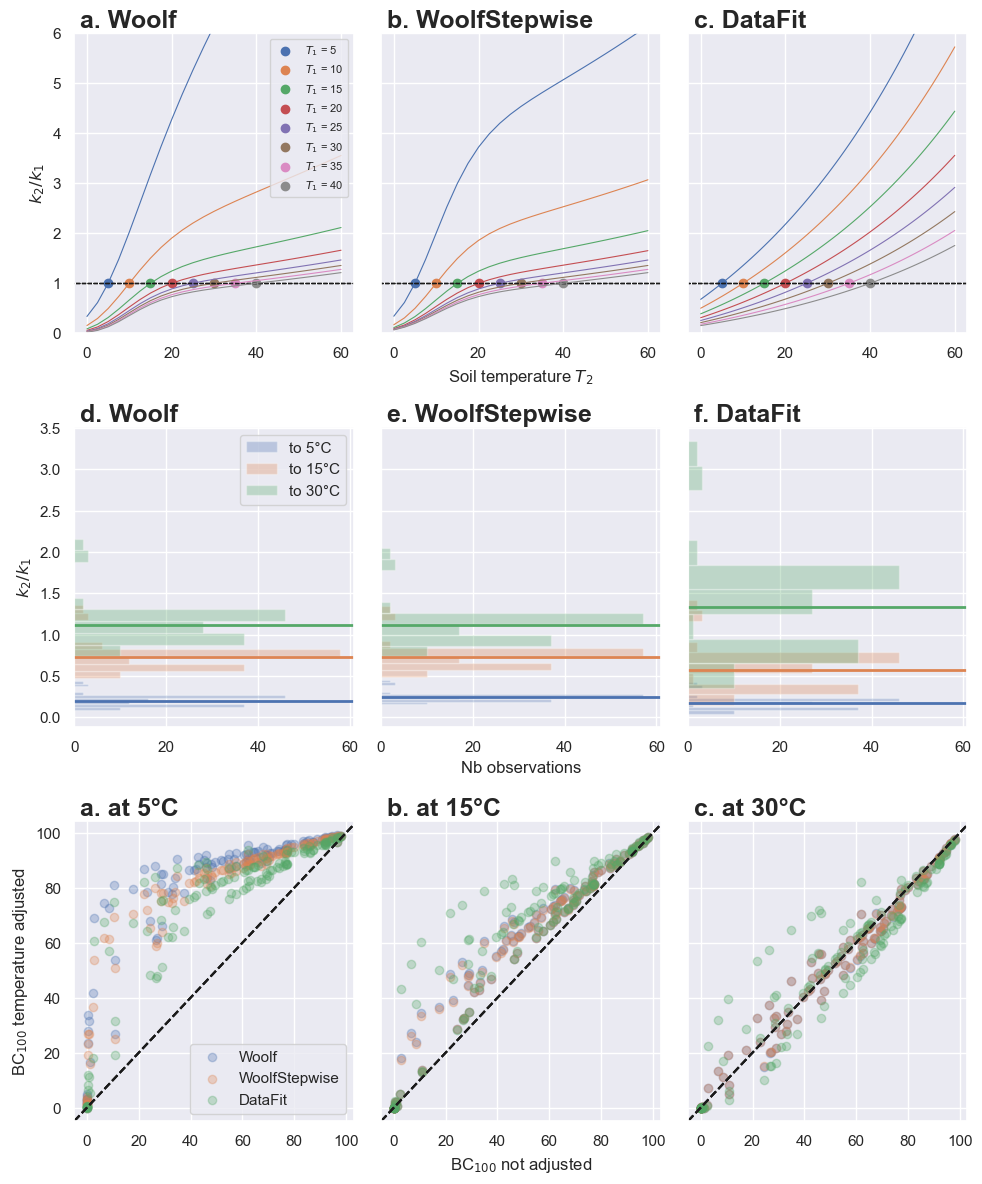

In [297]:
fig, ax = plt.subplots(3,3,figsize=(10,12),  sharey='row', sharex='row')
axl = ax.ravel()
fsa = 18
# ROW 1
L=6
# Woolf2021
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT_Woolf(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

def q10_var2(x0=5, a=0):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT_Woolf(x0, i) for i in x] # plot inverse relationship
    axl[a].axhline(y=1, color='k', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[a].plot(x, y, lw=0.8)
    axl[a].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    #axl[a].set_xlabel('Soil temperature $T_{2}$')
    axl[a].set_ylabel('$k_2/k_1$')
    axl[a].legend(fontsize=8, loc="upper right")
    axl[a].set_ylim([0,L])
    
for x0 in [5, 10, 15, 20, 25, 30, 35, 40]:
    q10_var2(x0)   

axl[0].text(0.02, 1.02, string.ascii_lowercase[0]+'. Woolf', transform=axl[0].transAxes, size=fsa, weight='bold')

# step-wise Woolf2021
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

def fT_WoolfStepwise(T1,T2, s=0.1):
    '''Calculates the fT with Woolf2021 method and a stepwise approach, to have a bijection'''
    f=1
    sign = +1 if T1<T2 else -1
    x = np.arange(T1, T2, sign*s)
    for i in x:
        f=f*fT(i,i+sign*s)
    return f

def q10_var2(x0=5, a=1):
    x = np.arange(0,60+2.5, 2.5)
    y = [fT_WoolfStepwise(x0, i) for i in x] # plot inverse relationship
    axl[a].axhline(y=1, color='k', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[a].plot(x, y, lw=0.8)
    axl[a].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    axl[a].set_xlabel('Soil temperature $T_{2}$')
    #axl[a].set_ylabel('$k_2/k_1$')
    #axl[a].legend(fontsize=8)
    axl[a].set_ylim([0,L])
    
for x0 in [5, 10, 15, 20, 25, 30, 35, 40]:
    q10_var2(x0)

axl[1].text(0.02, 1.02, string.ascii_lowercase[1]+'. WoolfStepwise', transform=axl[1].transAxes, size=fsa, weight='bold')

# Eye-fit on data
def custom2023_03_fT(T1, T2):
    '''from T1 to T2, using exponential relationship fitted on k_Y2 and Incubation temperature of whole dataset, by eye'''
    #return (0.7 * np.exp(0.0251*T2) - 0.6) / (0.7 * np.exp(0.0251*T1) - 0.6)
    return (0.9 * np.exp(0.0200*T2) - 0.7) / (0.9 * np.exp(0.0200*T1) - 0.7)

def q10_var2(x0=5, a=2):
    x = np.arange(0,60+1, 1)
    y = [custom2023_03_fT(x0, i) for i in x] # plot inverse relationship
    axl[a].axhline(y=1, color='k', xmin=-1, xmax=67, lw=0.8, ls='--')
    axl[a].plot(x, y, lw=0.8)
    axl[a].scatter(x0,1, label="$T_{1}$ = "+str(x0))
    #axl[a].set_xlabel('Soil temperature $T_{2}$')
    #axl[a].set_ylabel('$k_2/k_1$')
    #axl[a].legend(fontsize=8)
    axl[a].set_ylim([0,L])
    
for x0 in [5, 10, 15, 20, 25, 30, 35, 40]:
    q10_var2(x0)   
    
axl[2].text(0.02, 1.02, string.ascii_lowercase[2]+'. DataFit', transform=axl[2].transAxes, size=fsa, weight='bold')

    
# SECOND ROW
pal = sns.color_palette()

#plot histograms and mean value as bar
i=0
for j, T in enumerate([5, 15, 30]):
    h = pd.Series(df_fT.loc[T, 'Woolf']).hist(orientation='horizontal', alpha=0.3, color=pal[j], label='to '+str(T)+'°C', ax=ax[1, i])
    ax[1,i].axhline(y=df_fT_mean.loc[T, 'Woolf'], xmin=0, xmax=1, linewidth=2, color=pal[j])

axl[3+i].text(0.02, 1.02, string.ascii_lowercase[3+i]+'. Woolf', transform=axl[3+i].transAxes, size=fsa, weight='bold')

i=1
for j, T in enumerate([5, 15, 30]):
    pd.Series(df_fT.loc[T, 'WoolfStepwise']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[1, i])
    ax[1, i].axhline(y=df_fT_mean.loc[T, 'WoolfStepwise'], xmin=0, xmax=1, linewidth=2, color=pal[j])

axl[3+i].text(0.02, 1.02, string.ascii_lowercase[3+i]+'. WoolfStepwise', transform=axl[3+i].transAxes, size=fsa, weight='bold')

i=2
for j, T in enumerate([5, 15, 30]):
    pd.Series(df_fT.loc[T, 'DataFit']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[1,i])
    ax[1, i].axhline(y=df_fT_mean.loc[T, 'DataFit'], xmin=0, xmax=1, linewidth=2, color=pal[j])

axl[3+i].text(0.02, 1.02, string.ascii_lowercase[3+i]+'. DataFit', transform=axl[3+i].transAxes, size=fsa, weight='bold')

ax[1,0].legend(loc='upper right')
ax[1, 0].set_ylabel('$k_2/k_1$');
ax[1, 1].set_xlabel(r'Nb observations');

# THIRD ROW
i=0
tTs=5
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    ax[2,i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=m)
    ax[2,i].axline((0, 0), (1, 1), linewidth=1.5, color='k', ls='--')
    print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))
ax[2,i].text(0.02, 1.02, string.ascii_lowercase[i]+'. at '+str(tTs)+'°C', transform=ax[2,i].transAxes, size=18, weight='bold')

i=1
tTs=15
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    ax[2,i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=m)
    ax[2,i].axline((0, 0), (1, 1), linewidth=1.5, color='k', ls='--')
    print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))

ax[2,i].text(0.02, 1.02, string.ascii_lowercase[i]+'. at '+str(tTs)+'°C', transform=ax[2,i].transAxes, size=18, weight='bold')
i=2
tTs=30
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    ax[2,i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=m)
    ax[2,i].axline((0, 0), (1, 1), linewidth=1.5, color='k', ls='--')
    print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))    
ax[2,i].text(0.02, 1.02, string.ascii_lowercase[i]+'. at '+str(tTs)+'°C', transform=ax[2,i].transAxes, size=18, weight='bold')
    
ax[2,0].legend(loc='lower right')
ax[2,0].set_ylabel(r'BC$_{100}$ temperature adjusted');
ax[2,1].set_xlabel(r'BC$_{100}$ not adjusted');

fig.tight_layout()

In [298]:
# select set of incubation temperature, for observations with timedata only (128 obs)
met = metadata.copy()
obs_with_data = data['ID_obs'].unique() # altough 2 obs without important series
to_drop = list(set(met.index) - (set(obs_with_data) - {39, 111}))
met = met.drop(to_drop, inplace=False, axis=0)

Ts = met['IncubationTemperature'].dropna()
len(Ts)

# target temperatures
TT = [5, 10, 15, 20, 25, 30]

# loop, to calculate set of fT for each TT and for each method
fT_dict = {}
for T in TT:
    fT_dict[T] = {}
    fT_dict[T]['Woolf'] = [fT_Woolf(o, T) for o in Ts]
    fT_dict[T]['WoolfStepwise'] = [fT_WoolfStepwise(o, T) for o in Ts]
    fT_dict[T]['DataFit'] = [custom2023_03_fT(o, T) for o in Ts]
    
df_fT = pd.DataFrame.from_dict(fT_dict).T
df_fT

df_fT_mean = pd.DataFrame()
df_fT_mean.reindex_like(df_fT)
for t in df_fT.index:
    for c in df_fT.columns:
        df_fT_mean.at[t, c] = np.mean(df_fT.loc[t, c])
df_fT_mean

Woolf  WoolfStepwise  DataFit
5    0.20           0.25     0.38
10   0.47           0.49     0.51
15   0.73           0.74     0.66
20   0.91           0.91     0.82
25   1.03           1.03     1.00
30   1.12           1.11     1.20

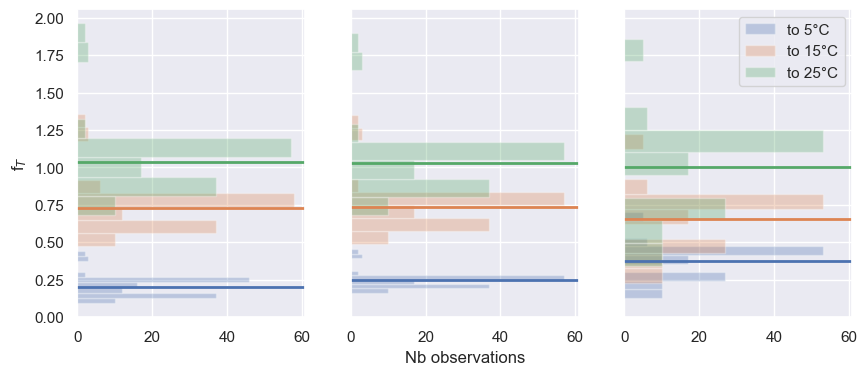

In [299]:
fig, ax = plt.subplots(1,3, figsize=(10,4), sharey=True, sharex=True)
pal = sns.color_palette()

#plot histograms and mean value as bar
i=0
for j, T in enumerate([5, 15, 25]):
    h = pd.Series(df_fT.loc[T, 'Woolf']).hist(orientation='horizontal', alpha=0.3, color=pal[j], label='to '+str(T)+'°C', ax=ax[i])
    ax[i].axhline(y=df_fT_mean.loc[T, 'Woolf'], xmin=0, xmax=1, linewidth=2, color=pal[j])

i=1
for j, T in enumerate([5, 15, 25]):
    pd.Series(df_fT.loc[T, 'WoolfStepwise']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[1])
    ax[i].axhline(y=df_fT_mean.loc[T, 'WoolfStepwise'], xmin=0, xmax=1, linewidth=2, color=pal[j])

i=2
for j, T in enumerate([5, 15, 25]):
    pd.Series(df_fT.loc[T, 'DataFit']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[2])
    ax[i].axhline(y=df_fT_mean.loc[T, 'DataFit'], xmin=0, xmax=1, linewidth=2, color=pal[j])

plt.legend(loc='upper right')
ax[0].set_ylabel(r'f$_T$');
ax[1].set_xlabel(r'Nb observations');

In [300]:
# calculate change in BC100, by applying the various methods

# Woolf2021
def Q10(T1, T2):
    '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
    '''
    return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

def fT_Woolf(T1, T2):
    '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
    return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

# step-wise Woolf2021
def fT_WoolfStepwise(T1,T2, s=0.001):
    '''Calculates the fT with Woolf2021 method and a stepwise approach, to have a bijection'''
    f=1
    sign = +1 if T1<T2 else -1
    x = np.arange(T1, T2, sign*s)
    for i in x:
        f=f*fT_Woolf(i,i+sign*s)
    return f

# Eye-fit on data
def fT_DataFit(T1, T2):
    '''from T1 to T2, using exponential relationship fitted on k_Y2 and Incubation temperature of whole dataset, by eye'''
    return (0.9 * np.exp(0.0200*T2) - 0.7) / (0.9 * np.exp(0.0200*T1) - 0.7)


def applyTempCorr(fitdata, metadata, tTs=14.9, TH=100, method=fT_Woolf):
    '''
    Applies the re-calibration of soil temperature to a calculated BC_TH value at a given soil temperature to the 
    target soil temperature tTs
    
    Inputs: \n 
        - tTs: target soil temperature, in degree C
        - TH: time horizon, in years
        - fT: pass a function used to calculate fT, among the fT availables:
                - fT_Woolf
                - fT_WoolfStepwise
                - fT_DataFit
        - metadata: dataframe with incubation meta-data
        - fitdata: dataframe containing all the fitting data, usually output of function `fit_all_observations`
    
    Outputs:  \n
        - a new dataframe based on fitdata, with a new column containing the recalibrated BC100 values.  
    '''
    
    FIT_PARAMS = {
        'singleExp': {'ki': ['k'], 'ci':['']},
        'doubleExp': {'ki': ['k1', 'k2'], 'ci':['c1']},
        'tripleExp': {'ki': ['k1', 'k2', 'k3'], 'ci':['c1', 'c2']}, # k1, k2, k3, c1, c2
        
        'singleExp_u': {'ki': ['k'], 'ci':['c']},
        'doubleExp_u': {'ki': ['k1', 'k2'], 'ci':['c1', 'c2']},
        'tripleExp_u': {'ki': ['k1', 'k2', 'k3'], 'ci':['c1', 'c2', 'c3']},
        
        'powerModel': None, # Correction supported by separate function, powerModel_q10
    }
    
    df2 = fitdata.copy(deep=True)
    list_fT = []
    list_newBC100 = []
    list_oldBC100 = []
    
    for i, obs in fitdata.iterrows():
        ID_OBS = obs[('observation','ID_obs', 'int')]
        #print(i, ID_OBS)
        FIT_func = obs[('strategy','model', 'str')]
        #print(FIT_func)
        TS = metadata.loc[ID_OBS, 'IncubationTemperature']
        #print(TS)
        oldBC100 = obs[('estimator','BC100','%')]
        
        # find the fitting parameters in fitted_params
        fitparams = fitdata.xs('parameter', level='category', axis=1).loc[i]
        
        #calc fT
        ft = method(TS, tTs)
        list_fT.append(ft)
        
        # apply correction to decay constants
        if FIT_func == 'singleExp':
            newBC100 = bs.singleExp(TH*365, ft*fitparams['k'][0])
        elif FIT_func == 'singleExp_u':
            newBC100 = bs.singleExp_u(TH*365, ft*fitparams['k'][0], fitparams['c'][0])            
        elif FIT_func == 'doubleExp':
            newBC100 = bs.doubleExp(TH*365, ft*fitparams['k1'][0], ft*fitparams['k2'][0], fitparams['c1'][0])
        elif FIT_func == 'doubleExp_u':
            newBC100 = bs.doubleExp_u(TH*365, ft*fitparams['k1'][0], ft*fitparams['k2'][0], fitparams['c1'][0], fitparams['c2'][0])
        elif FIT_func == 'tripleExp':
            newBC100 = bs.tripleExp(TH*365, ft*fitparams['k1'][0], ft*fitparams['k2'][0], ft*fitparams['k3'][0], fitparams['c1'][0], fitparams['c2'][0])
        elif FIT_func == 'tripleExp_u':
            newBC100 = bs.tripleExp_u(TH*365, ft*fitparams['k1'][0], ft*fitparams['k2'][0], ft*fitparams['k3'][0], fitparams['c1'][0], fitparams['c2'][0], fitparams['c3'][0])
        elif FIT_func == 'powerModel':
            newBC100 = bs.powerModel_q10(TH*365, ft, fitparams['c0'][0], fitparams['b'][0], fitparams['m'][0], )
        else:
            # not supported
            newBC100 = obs[('estimator','BC100','%')] # copy previous value
            print("Warning: encoutered model function not supported by Q10 recalibration for obs: ", ID_OBS, FIT_func)
        list_newBC100.append(newBC100)
        list_oldBC100.append(oldBC100)
        #print(type(fitparams['k']))

    
        #if i > 2:
        #    break
    #df2[('q10correction','Q10','1')] = list_Q10
    df2[('q10correction','fT','1')] = list_fT
    df2[('q10correction','BC_TH_val_TS_val','%')] = list_newBC100
    return df2 , list_oldBC100, list_newBC100


def calculate_r_squared(x, y):
    # Calculate the coefficients of the linear regression
    coeffs = np.polyfit(x, y, 1)
    p = np.poly1d(coeffs)

    # Calculate the predicted values
    y_pred = p(x)

    # Calculate the total sum of squares
    ss_total = np.sum((y - np.mean(y))**2)

    # Calculate the residual sum of squares
    ss_residual = np.sum((y - y_pred)**2)

    # Calculate the R-squared value
    r_squared = 1 - (ss_residual / ss_total)

    return r_squared

In [301]:
# loading the best-fit-data
S1_bestfit = pd.read_excel('simulations/manuscript/bestfits_'+'S1'+'.xlsx', index_col=0)
S2_bestfit = pd.read_excel('simulations/manuscript/bestfits_'+'S2'+'.xlsx', index_col=0)
S3_bestfit = pd.read_excel('simulations/manuscript/bestfits_'+'S3'+'.xlsx', index_col=0)
S4_bestfit = pd.read_excel('simulations/manuscript/bestfits_'+'S4'+'.xlsx', index_col=0)

# working with strategy S2 (all exponentials)
fitdata = S2_bestfit.copy()

# restore the multi-index used in plotting function to indentify parameters (it's removed in best-fit selection function)
day_run = '2023-06-27'
temp = bs.load_fitted_observations('simulations/manuscript/curve-fitting_alllibs_allfits_v'+day_run+'.xlsx')
multiIndex = temp.columns 
fitdata.columns = multiIndex

In [302]:
BC_dict = {}
for tTs in TT:
    BC_dict[tTs] = {}
    _, oldBC, BC_dict[tTs]['Woolf'] = applyTempCorr(fitdata, metadata, tTs=tTs, TH=100, method=fT_Woolf)
    _, oldBC, BC_dict[tTs]['WoolfStepwise'] = applyTempCorr(fitdata, metadata, tTs=tTs, TH=100, method=fT_WoolfStepwise)
    _, oldBC, BC_dict[tTs]['DataFit'] = applyTempCorr(fitdata, metadata, tTs=tTs, TH=100, method=fT_DataFit)
    
df_BC = pd.DataFrame.from_dict(BC_dict).T
df_BC

Woolf  \
5   [93.80170612720333, 97.67203911135513, 99.1642...   
10  [87.92845368704991, 94.70834239894808, 98.2240...   
15  [82.58579858426623, 91.92837993232479, 97.3234...   
20  [79.0699817603401, 90.04372306170175, 96.70215...   
25  [76.89889529777373, 88.85478434956867, 96.3055...   
30  [75.4056446098168, 88.02537606767912, 96.02674...   

                                        WoolfStepwise  \
5   [92.63532615361798, 97.12541772025297, 98.9923...   
10  [87.37955561212137, 94.45104089437442, 98.1414...   
15  [82.4733692079085, 91.87767665693124, 97.30685...   
20  [79.06126375838579, 90.04054585485737, 96.7010...   
25  [76.89887760306502, 88.85478434956867, 96.3055...   
30  [75.40615361649824, 88.02605253006406, 96.0269...   

                                              DataFit  
5   [89.72846100060335, 95.57424857324344, 98.5008...  
10  [86.90498982906946, 94.09591247390443, 98.0272...  
15  [83.8878098311525, 92.48868458740695, 97.50646...  
20  [80.67501609692032, 90.74433917025952, 96.9341...  
25  [77.26727361567534, 88.85478434956867, 96.3055...  
30  [73.66833389774195, 86.81224030898217, 95.6156...

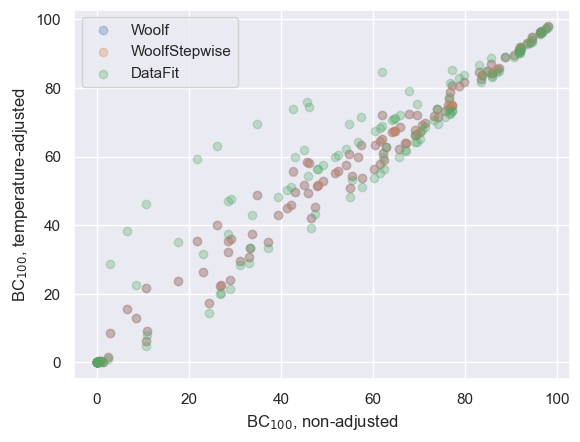

In [303]:
tTs=25
plt.scatter(oldBC, BC_dict[tTs]['Woolf'], alpha=0.3, label='Woolf')
plt.scatter(oldBC, BC_dict[tTs]['WoolfStepwise'], alpha=0.3, label='WoolfStepwise')
plt.scatter(oldBC, BC_dict[tTs]['DataFit'], alpha=0.3, label='DataFit')
plt.legend()
plt.xlabel('BC$_{100}$, non-adjusted')
plt.ylabel('BC$_{100}$, temperature-adjusted');


5 Woolf 0.6662102871379667
5 WoolfStepwise 0.7441581528900312
5 DataFit 0.7534433362994967
15 Woolf 0.9498585676177195
15 WoolfStepwise 0.9536153156509418
15 DataFit 0.8451784182435559
30 Woolf 0.9833464272747845
30 WoolfStepwise 0.9834696739881504
30 DataFit 0.8979986454209502


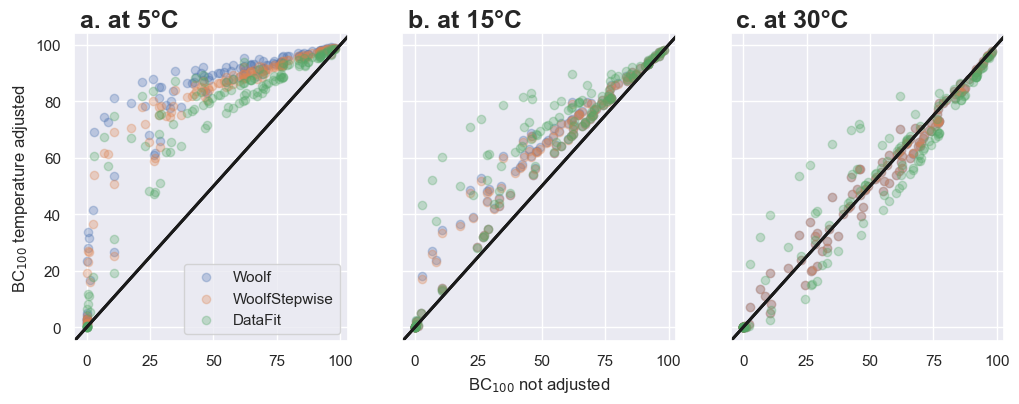

In [304]:
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True, sharex=True)
pal = sns.color_palette()

#plot histograms and mean value as bar
i=0
tTs=5
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    ax[i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=m)
    ax[i].axline((0, 0), (1, 1), linewidth=2, color='k')
    print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))
ax[i].text(0.02, 1.02, string.ascii_lowercase[i]+'. at '+str(tTs)+'°C', transform=ax[i].transAxes, size=18, weight='bold')

i=1
tTs=15
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    ax[i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=m)
    ax[i].axline((0, 0), (1, 1), linewidth=2, color='k')
    print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))

ax[i].text(0.02, 1.02, string.ascii_lowercase[i]+'. at '+str(tTs)+'°C', transform=ax[i].transAxes, size=18, weight='bold')
i=2
tTs=30
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    ax[i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=m)
    ax[i].axline((0, 0), (1, 1), linewidth=2, color='k')
    print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))    
ax[i].text(0.02, 1.02, string.ascii_lowercase[i]+'. at '+str(tTs)+'°C', transform=ax[i].transAxes, size=18, weight='bold')
    
    
ax[0].legend(loc='lower right')
ax[0].set_ylabel(r'BC$_{100}$ temperature adjusted');
ax[1].set_xlabel(r'BC$_{100}$ not adjusted');





Analysis:
* Converting data to a low target temperature (5, 10): there is a slight difference between Woolf & WoolfStepwise. But at higher target temperatures (20, 25, 30), there is little to no difference: this seems to be a consequence of the assumed Q10 relationship (Eq X) which varies only little at tempeartures above 20C. We do not investigate behaviour at extremely high target soil temperature (>40, deemed less relevant in practice and altered soil microbiology). 
* At low temperature, using WoolfStepwise yields lower BC100 than Woolf (average relative reduction at 5C): Stepwise approach is slightly less optimistic for low-temperatures. DataFit is for many observations also less, more conservative than Stepwise for most observations, but not all dots. 

* At higher temperatures, DataFit does not converge with other two methods, neither does it converge towards conversion factors of 1 fully. For a series of observations, correction remains high across all temperatures (i.e. furthest away from the diagonal, and towards increased BC100). These observations corresponds to biochars from Fang2014 with incubation at 40C and 60C.

* We note that all corrections do not affect BC100 much whenever BC100 is low (close to 0) or high (close to 100%).



* Which method reduces most the spread, vertical error for given H/C ? or for low-high BC 100 ?

<AxesSubplot: >

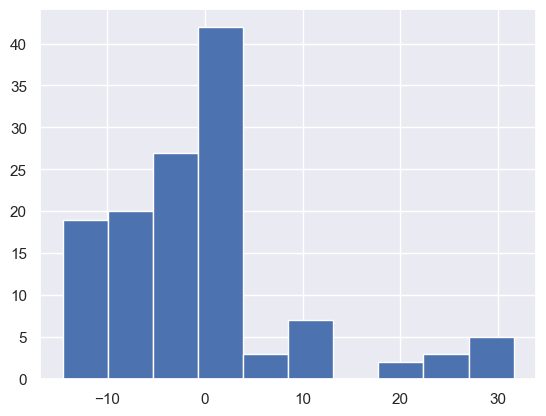

In [305]:
#pd.set_option('display.precision', 2)
pd.options.display.float_format = "{:,.2f}".format

collate = pd.DataFrame( index=fitdata[('observation', 'ID_obs', 'int')].values)
collate['BC100'] = oldBC
collate['DataFit_'+str(tTs)] = BC_dict[tTs]['DataFit']
collate['change DataFit_'+str(tTs)] = collate['DataFit_'+str(tTs)] - collate['BC100']
collate['change DataFit_'+str(tTs)].hist()

In [306]:
collate[ collate['change DataFit_'+str(tTs)] > 10.]
# these observations are, exactly the ones from Fang with T_inb of 40 and 60C 

BC100  DataFit_30  change DataFit_30
9   29.19       41.09              11.90
10  10.60       39.69              29.09
13  34.92       64.80              29.88
15  45.08       56.22              11.14
16  21.85       53.41              31.57
19  62.04       82.04              20.00
22   2.84       22.51              19.67
24  28.46       40.39              11.93
25  42.68       69.75              27.08
27  17.62       28.52              10.89
28   6.66       31.90              25.24
31  26.20       57.49              31.30
33  43.11       54.27              11.17
34  46.23       70.74              24.51
37  45.77       72.00              26.23

In [307]:
df_BC_mean = pd.DataFrame()
df_BC_mean.reindex_like(df_BC)
for t in df_BC.index:
    for c in df_BC.columns:
        df_BC_mean.at[t, c] = np.mean(df_BC.loc[t, c])
df_BC_mean

Woolf  WoolfStepwise  DataFit
5   79.71          77.13    73.00
10  69.06          68.04    68.87
15  61.45          61.24    64.87
20  57.09          57.06    60.97
25  54.61          54.61    57.13
30  52.98          52.99    53.36

In [308]:
df_BC_std = pd.DataFrame()
df_BC_std.reindex_like(df_BC)
for t in df_BC.index:
    for c in df_BC.columns:
        df_BC_std.at[t, c] = np.std(df_BC.loc[t, c])
df_BC_std

Woolf  WoolfStepwise  DataFit
5   27.62          27.88    29.29
10  29.45          29.51    29.60
15  29.92          29.94    29.70
20  30.06          30.07    29.70
25  30.11          30.11    29.66
30  30.12          30.12    29.58

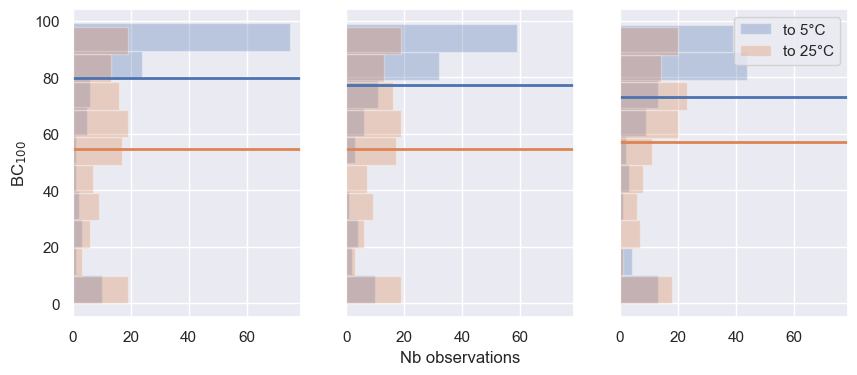

In [309]:
fig, ax = plt.subplots(1,3, figsize=(10,4), sharey=True, sharex=True)
pal = sns.color_palette()

#plot histograms and mean value as bar
i=0
for j, T in enumerate([5, 25]):
    h = pd.Series(df_BC.loc[T, 'Woolf']).hist(orientation='horizontal', alpha=0.3, color=pal[j], label='to '+str(T)+'°C', ax=ax[i])
    ax[i].axhline(y=df_BC_mean.loc[T, 'Woolf'], xmin=0, xmax=1, linewidth=2, color=pal[j])

i=1
for j, T in enumerate([5, 25]):
    pd.Series(df_BC.loc[T, 'WoolfStepwise']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[1])
    ax[i].axhline(y=df_BC_mean.loc[T, 'WoolfStepwise'], xmin=0, xmax=1, linewidth=2, color=pal[j])

i=2
for j, T in enumerate([5, 25]):
    pd.Series(df_BC.loc[T, 'DataFit']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[2])
    ax[i].axhline(y=df_BC_mean.loc[T, 'DataFit'], xmin=0, xmax=1, linewidth=2, color=pal[j])

plt.legend(loc='upper right')
ax[0].set_ylabel(r'BC$_{100}$');
ax[1].set_xlabel(r'Nb observations');

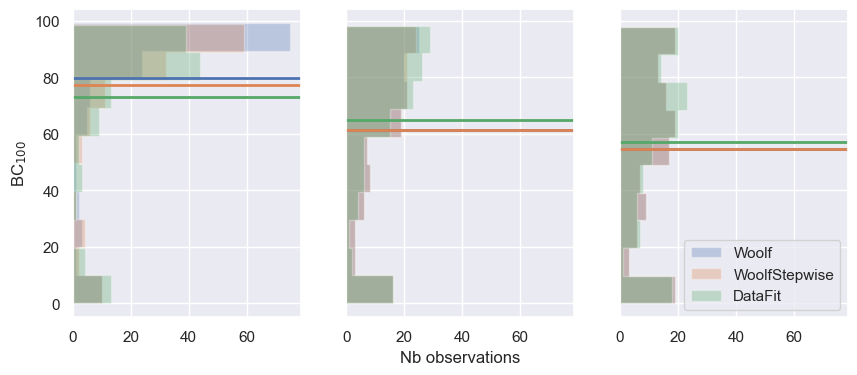

In [310]:
fig, ax = plt.subplots(1,3, figsize=(10,4), sharey=True, sharex=True)
pal = sns.color_palette()

#plot histograms and mean value as bar
i=0
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    h = pd.Series(df_BC.loc[5, m]).hist(orientation='horizontal', alpha=0.3, color=pal[j], label=m, ax=ax[i], histtype='stepfilled')
    ax[i].axhline(y=df_BC_mean.loc[5, m], xmin=0, xmax=1, linewidth=2, color=pal[j])
    
i=1
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    h = pd.Series(df_BC.loc[15, m]).hist(orientation='horizontal', alpha=0.3, color=pal[j], label=m, ax=ax[i], histtype='stepfilled')
    ax[i].axhline(y=df_BC_mean.loc[15, m], xmin=0, xmax=1, linewidth=2, color=pal[j])

i=2
for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
    h = pd.Series(df_BC.loc[25, m]).hist(orientation='horizontal', alpha=0.3, color=pal[j], label=m, ax=ax[i], histtype='stepfilled')
    ax[i].axhline(y=df_BC_mean.loc[25, m], xmin=0, xmax=1, linewidth=2, color=pal[j])

plt.legend(loc='lower right')
ax[0].set_ylabel(r'BC$_{100}$');
ax[1].set_xlabel(r'Nb observations');

In [311]:
x0

40

5 Woolf 0.6662102871379667
5 WoolfStepwise 0.7441581528900312
5 DataFit 0.7534433362994967
15 Woolf 0.9498585676177195
15 WoolfStepwise 0.9536153156509418
15 DataFit 0.8451784182435559
30 Woolf 0.9833464272747845
30 WoolfStepwise 0.9834696739881504
30 DataFit 0.8979986454209502


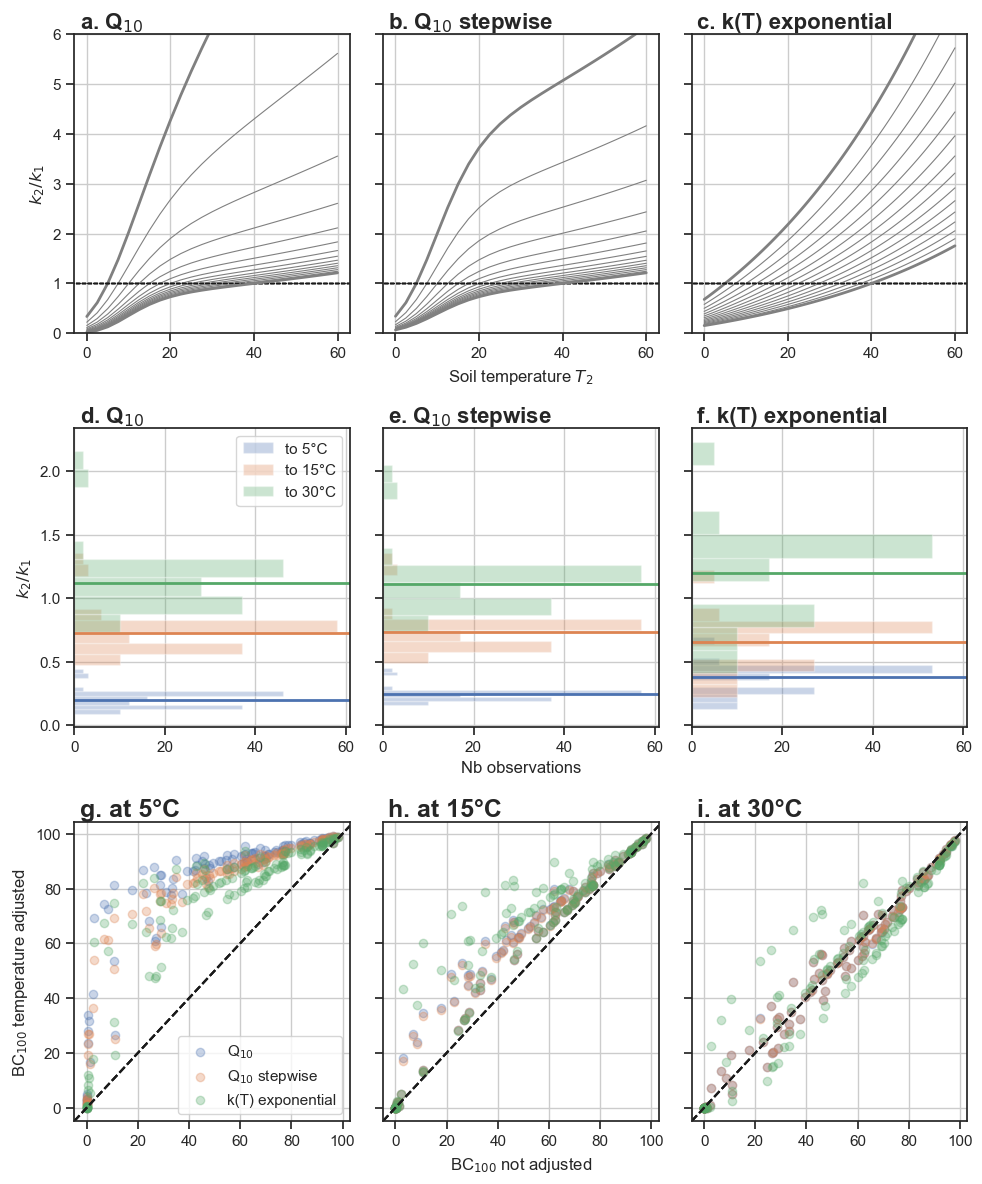

In [316]:
with sns.axes_style("ticks"):

    fig, ax = plt.subplots(3,3,figsize=(10,12),  sharey='row', sharex='row')
    axl = ax.ravel()
    fsa = 16
    # ROW 1
    L=6
    abaque = np.arange(5, 40+2.5, 2.5)

    # Woolf2021
    def Q10(T1, T2):
        '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
        '''
        return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

    def fT_Woolf(T1, T2):
        '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
        return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

    def q10_var2(x0=5, a=0):
        x = np.arange(0,60+2.5, 2.5)
        y = [fT_Woolf(x0, i) for i in x] # plot inverse relationship
        axl[a].axhline(y=1, color='k', xmin=-1, xmax=67, lw=0.8, ls='--')
        if x0 in [np.min(abaque), np.max(abaque)]:
            lw=2
        else:
            lw=0.8
        axl[a].plot(x, y, lw=lw, color='grey' )
        #axl[a].scatter(x0,1, label="$T_{1}$ = "+str(x0))
        #axl[a].set_xlabel('Soil temperature $T_{2}$')
        axl[a].set_ylabel('$k_2/k_1$')
        #axl[a].legend(fontsize=8, loc="upper right")
        axl[a].set_ylim([0,L])

    for x0 in abaque:
        q10_var2(x0)   

    axl[0].text(0.02, 1.02, string.ascii_lowercase[0]+r'. Q$_{10}$', transform=axl[0].transAxes, size=fsa, weight='bold')

    # step-wise Woolf2021
    def Q10(T1, T2):
        '''calculate Q10 average factor, based on relationship given Woolf 2021 ES&T
        '''
        return 1.1 + ( 63.1579*(np.exp(-0.19*T1) - np.exp(-0.19*T2)) / (T2-T1) )

    def fT(T1, T2):
        '''calculate the fT ratio of the decay rates at exp temperature Ts over target temperature tTs, based on Woolf 2021 ES&T'''
        return 1 if T1 == T2 else np.exp( np.log(Q10(T1, T2)) * (T2-T1)/10 )

    def fT_WoolfStepwise(T1,T2, s=0.01):
        '''Calculates the fT with Woolf2021 method and a stepwise approach, to have a bijection'''
        f=1
        sign = +1 if T1<T2 else -1
        x = np.arange(T1, T2, sign*s)
        for i in x:
            f=f*fT(i,i+sign*s)
        return f

    def q10_var2(x0=5, a=1):
        x = np.arange(0,60+2.5, 2.5)
        y = [fT_WoolfStepwise(x0, i) for i in x] # plot inverse relationship
        axl[a].axhline(y=1, color='k', xmin=-1, xmax=67, lw=0.8, ls='--')
        if x0 in [np.min(abaque), np.max(abaque)]:
            lw=2
        else:
            lw=0.8
        axl[a].plot(x, y, lw=lw, color='grey', )
        #axl[a].scatter(x0,1, label="$T_{1}$ = "+str(x0))
        axl[a].set_xlabel('Soil temperature $T_{2}$')
        #axl[a].set_ylabel('$k_2/k_1$')
        #axl[a].legend(fontsize=8)
        axl[a].set_ylim([0,L])

    for x0 in abaque:
        q10_var2(x0)

    axl[1].text(0.02, 1.02, string.ascii_lowercase[1]+r'. Q$_{10}$ stepwise', transform=axl[1].transAxes, size=fsa, weight='bold')

    # Eye-fit on data
    def custom2023_03_fT(T1, T2):
        '''from T1 to T2, using exponential relationship fitted on k_Y2 and Incubation temperature of whole dataset, by eye'''
        #return (0.7 * np.exp(0.0251*T2) - 0.6) / (0.7 * np.exp(0.0251*T1) - 0.6)
        return (0.9 * np.exp(0.0200*T2) - 0.7) / (0.9 * np.exp(0.0200*T1) - 0.7)

    def q10_var2(x0=5, a=2):
        x = np.arange(0,60+1, 1)
        y = [custom2023_03_fT(x0, i) for i in x] # plot inverse relationship
        axl[a].axhline(y=1, color='k', xmin=-1, xmax=67, lw=0.8, ls='--')
        if x0 in [np.min(abaque), np.max(abaque)]:
            lw=2
        else:
            lw=0.8
        axl[a].plot(x, y, lw=lw, color='grey', )
        #axl[a].scatter(x0,1, label="$T_{1}$ = "+str(x0))
        #axl[a].set_xlabel('Soil temperature $T_{2}$')
        #axl[a].set_ylabel('$k_2/k_1$')
        #axl[a].legend(fontsize=8)
        axl[a].set_ylim([0,L])

    for x0 in abaque:
        q10_var2(x0)   

    axl[2].text(0.02, 1.02, string.ascii_lowercase[2]+'. k(T) exponential', transform=axl[2].transAxes, size=fsa, weight='bold')

    axl[0].grid(visible=True)
    axl[1].grid(visible=True)
    axl[2].grid(visible=True)

    # SECOND ROW
    pal = sns.color_palette()

    #plot histograms and mean value as bar
    i=0
    for j, T in enumerate([5, 15, 30]):
        h = pd.Series(df_fT.loc[T, 'Woolf']).hist(orientation='horizontal', alpha=0.3, color=pal[j], label='to '+str(T)+'°C', ax=ax[1, i])
        ax[1,i].axhline(y=df_fT_mean.loc[T, 'Woolf'], xmin=0, xmax=1, linewidth=2, color=pal[j])

    axl[3+i].text(0.02, 1.02, string.ascii_lowercase[3+i]+r'. Q$_{10}$', transform=axl[3+i].transAxes, size=fsa, weight='bold')

    i=1
    for j, T in enumerate([5, 15, 30]):
        pd.Series(df_fT.loc[T, 'WoolfStepwise']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[1, i])
        ax[1, i].axhline(y=df_fT_mean.loc[T, 'WoolfStepwise'], xmin=0, xmax=1, linewidth=2, color=pal[j])

    axl[3+i].text(0.02, 1.02, string.ascii_lowercase[3+i]+r'. Q$_{10}$ stepwise', transform=axl[3+i].transAxes, size=fsa, weight='bold')

    i=2
    for j, T in enumerate([5, 15, 30]):
        pd.Series(df_fT.loc[T, 'DataFit']).hist(orientation='horizontal', alpha=0.3, label='to '+str(T)+'°C', ax=ax[1,i])
        ax[1, i].axhline(y=df_fT_mean.loc[T, 'DataFit'], xmin=0, xmax=1, linewidth=2, color=pal[j])

    axl[3+i].text(0.02, 1.02, string.ascii_lowercase[3+i]+'. k(T) exponential', transform=axl[3+i].transAxes, size=fsa, weight='bold')

    ax[1,0].legend(loc='upper right')
    ax[1, 0].set_ylabel('$k_2/k_1$');
    ax[1, 1].set_xlabel(r'Nb observations');

    # THIRD ROW
    offnames = {'Woolf':r'Q$_{10}$', 'WoolfStepwise':r'Q$_{10}$ stepwise', 'DataFit':'k(T) exponential'}
    i=0
    tTs=5
    for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
        ax[2,i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=offnames[m])
        ax[2,i].axline((0, 0), (1, 1), linewidth=1.5, color='k', ls='--')
        print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))
    ax[2,i].text(0.02, 1.02, string.ascii_lowercase[6+i]+'. at '+str(tTs)+'°C', transform=ax[2,i].transAxes, size=18, weight='bold')

    i=1
    tTs=15
    for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
        ax[2,i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=offnames[m])
        ax[2,i].axline((0, 0), (1, 1), linewidth=1.5, color='k', ls='--')
        print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))

    ax[2,i].text(0.02, 1.02, string.ascii_lowercase[6+i]+'. at '+str(tTs)+'°C', transform=ax[2,i].transAxes, size=18, weight='bold')
    i=2
    tTs=30
    for j, m in enumerate(['Woolf', 'WoolfStepwise', 'DataFit']):
        ax[2,i].scatter(oldBC, BC_dict[tTs][m], alpha=0.3, label=offnames[m])
        ax[2,i].axline((0, 0), (1, 1), linewidth=1.5, color='k', ls='--')
        print(tTs, m, calculate_r_squared(oldBC, BC_dict[tTs][m]))    
    ax[2,i].text(0.02, 1.02, string.ascii_lowercase[6+i]+'. at '+str(tTs)+'°C', transform=ax[2,i].transAxes, size=18, weight='bold')

    ax[2,0].legend(loc='lower right')
    ax[2,0].set_ylabel(r'BC$_{100}$ temperature adjusted');
    ax[2,1].set_xlabel(r'BC$_{100}$ not adjusted');

    axl[6].grid(visible=True)
    axl[7].grid(visible=True)
    axl[8].grid(visible=True)

    fig.tight_layout()
    
plt.savefig('simulations/manuscript/temperature-correction-all-in-one.png', dpi=600)

Conclusion:
* Woolf & WoolfStepWise are equal at higher soil temperatures; but differ somewhat at lower temperatures. 
* DataFit has more ample correction effects on both lower and higher target temperatures, and in particular for observations incubated at higher temperatures

* Noting that the Q10 relationship, attempts to re-build it from original data were not successful; hence, the development of a simple fT with the info from the dataset. 

So, which what do we want to use for our models:
- if we exclude, all observations with high incubation temperatures (because of bad fit), little value to use DataFit. If we keep, them, could be useful at reducing spread. Do the check on Fang2014 at 20 and 40 C ? 
- if we care about predictions at low soil temperatures to not be less conservative than Woolf; then, worth using StepWiseCorrected or DataFit

Let's use DataFit because:
- incubation high temp get better reduction towards the '20' values #Fang
- at lower target temperatures; more conservative than other two
- virtue of simplicity over complexity (vs stepwise is very complex and difficult to implement in Excel, because of iterative aspect)
- relationship, directly derived from the dataset (while Q10 data was not possible to reproduce)





What about the Fang 2014 data: incubations at 20 matching with 40 and 60 ?

* better but not perfect, and much better than Woolf&StepWiseWoolf which are identical
* remaining error, can be also attributed to fitting of poor exp data

In [313]:
#pd.set_option('display.precision', 2)
pd.options.display.float_format = "{:,.2f}".format

tTs = 20
collate = pd.DataFrame( index=fitdata[('observation', 'ID_obs', 'int')].values)
collate['BC100'] = oldBC
collate['DataFit_'+str(tTs)] = BC_dict[tTs]['DataFit']
collate['Woolf'+str(tTs)] = BC_dict[tTs]['Woolf']
collate['StepwiseWoolf'+str(tTs)] = BC_dict[tTs]['WoolfStepwise']

collate['change DataFit_'+str(tTs)] = collate['DataFit_'+str(tTs)] - collate['BC100']

In [314]:
fang2014obs = metadata[metadata['AuthorDate'] == 'Fang2014'].index

In [315]:
collate.loc[fang2014obs]

BC100  DataFit_20  Woolf20  StepwiseWoolf20  change DataFit_20
ID_obs                                                                
8       77.28       77.28    77.28            77.28               0.00
9       29.19       54.37    40.57            40.45              25.18
10      10.60       53.11    25.86            25.69              42.51
11      87.36       87.36    87.36            87.36               0.00
12      57.54       75.97    66.65            66.57              18.43
13      34.92       74.27    53.03            52.86              39.35
14      77.33       77.33    77.33            77.33               0.00
15      45.08       67.36    55.76            55.65              22.29
16      21.85       65.05    39.97            39.78              43.21
17      90.75       90.75    90.75            90.75               0.00
18      67.81       82.46    75.21            75.14              14.65
19      62.04       87.25    74.93            74.82              25.21
20      75.81       75.81    75.81            75.81               0.00
21       8.48       29.56    16.43            16.33              21.08
22       2.84       35.54    11.49            11.37              32.70
23      87.10       87.10    87.10            87.10               0.00
24      28.46       53.80    39.87            39.75              25.35
25      42.68       77.73    59.48            59.33              35.06
26      76.90       76.90    76.90            76.90               0.00
27      17.62       42.29    28.01            27.90              24.67
28       6.66       45.06    19.19            19.03              38.40
29      91.86       91.86    91.86            91.86               0.00
30      54.79       74.17    64.32            64.23              19.38
31      26.20       68.37    44.55            44.37              42.18
32      91.90       91.90    91.90            91.90               0.00
33      43.11       65.54    53.81            53.70              22.43
34      46.23       77.70    61.62            61.49              31.46
35      94.18       94.18    94.18            94.18               0.00
36      77.32       87.67    82.64            82.59              10.35
37      45.77       79.56    62.16            62.01              33.79